<a href="https://colab.research.google.com/github/ksjgh/AI_for_ME/blob/main/17_Dynamics%2BAI_Double_Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br><br>
<font size='6'><b>AI for Mechanical Engineering: Dynamics</b></font><br><br>

<br>
<div class=pull-right>
By Keonhyeok Park<br>
http://iailab.kaist.ac.kr/<br>
Industrial AI Lab at KAIST
</div>


# 1. Projectile Motion (Trajectory Prediction)

<b> Decomposing Initial Velocity </b>

The initial velocity $v_0$ is decomposed into horizontal ($ v_{x0} $) and vertical ($ v_{y0} $) components based on the launch angle $ \theta $:

$$
    v_{x0} = v_0 cos(\theta)
$$
$$
    v_{y0} = v_0 sin(\theta)
$$

<b> Air Resistance (Drag Force) </b>

The drag force $ F_d $ acting on the projectile is given by Newton's drag law, which states that the drag force is proportional to the square of the velocity. The drag force can be calculated as:
$$
 F_d = \frac{1}{2} C_d \rho A v^2
$$
where:
- $ C_d $ is the drag coefficient
- $ \rho $ is the air density
- $ A $ is the cross-sectional area of the projectile
- $ v $ is the instantaneous velocity of the projectile

<b> Acceleration Components </b>
    
The horizontal ($ a_x $) and vertical ($ a_y $) components of acceleration due to drag and gravity are given by:

$$ a_x = -\frac{F_d}{m} \cdot \frac{v_x}{v} $$

$$ a_y = -g - \frac{F_d}{m} \cdot \frac{v_y}{v} $$

where:
- $ g $ is the acceleration due to gravity (9.81 m/s²)
- $ m $ is the mass of the projectile
- $ v_x $ and $ v_y $ are the horizontal and vertical components of the velocity, respectively

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

import os

## Lab 1: Projectile Motion with Air Resistance
- Input: Initial angle ($\theta$), initial velocity ($v$)
- Output: Trajectory

### Projectile Data Generation

- 1,000 dataset
- Angles: 10 to 80 degrees
- Velocities: 50 to 1000 m/s

<b> Data Visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


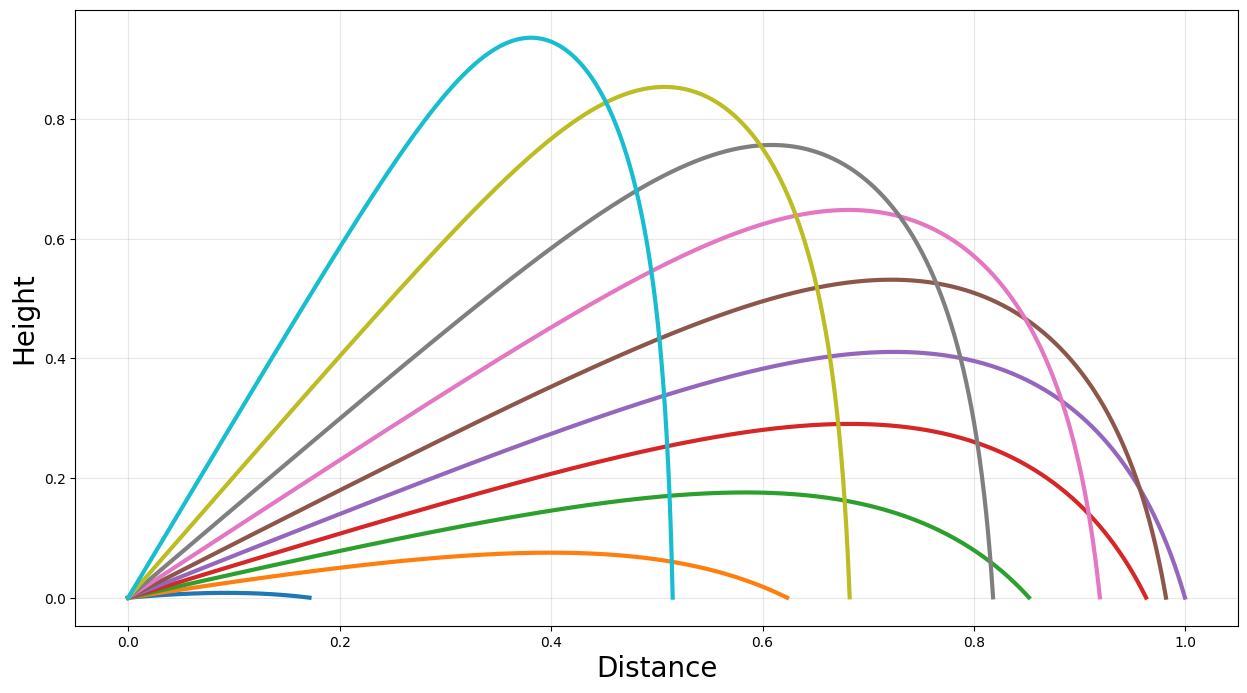

In [ ]:
X_train = np.load('/content/drive/MyDrive/ML_Colab/ML_data/01_projectile_Lab1_X_train.npy')
y_train = np.load('/content/drive/MyDrive/ML_Colab/ML_data/01_projectile_Lab1_y_train.npy')
X_test = np.load('/content/drive/MyDrive/ML_Colab/ML_data/01_projectile_Lab1_X_test.npy')
y_test = np.load('/content/drive/MyDrive/ML_Colab/ML_data/01_projectile_Lab1_y_test.npy')

random_idx = np.arange(0,1000,100)
plt.figure(figsize = (15,8))
for idx in random_idx:
    plt.plot(y_train[idx,:,0],y_train[idx,:,1], label = idx, linewidth=3, linestyle='-')
plt.xlabel('Distance', fontsize = 20)
plt.ylabel('Height', fontsize = 20)
plt.grid(alpha = 0.3)

### LSTM Model Architecture

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(2,)))  # (batch_size, 2) -> (batch_size, 128)
model.add(RepeatVector(y_train.shape[1])) # (batch_size, 1000, 128)
model.add(LSTM(128, return_sequences=True)) # (batch_size, 1000, 128)
model.add(Dense(2))  # (batch_size, 1000, 2) == (batch_size, timesteps, features)

# Model compile
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 repeat_vector_1 (RepeatVec  (None, 1000, 128)         0         
 tor)                                                            
                                                                 
 lstm_1 (LSTM)               (None, 1000, 128)         131584    
                                                                 
 dense_4 (Dense)             (None, 1000, 2)           258       
                                                                 
Total params: 132226 (516.51 KB)
Trainable params: 132226 (516.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
25/25 [==============================] - 3s 53ms/step - loss: 0.0594 - val_loss: 0.1276
Epoch 2/20
25/25 [==============================] - 1s 34ms/step - loss: 0.0440 - val_loss: 0.0634
Epoch 3/20
25/25 [==============================] - 1s 34ms/step - loss: 0.0424 - val_loss: 0.0590
Epoch 4/20
25/25 [==============================] - 1s 34ms/step - loss: 0.0413 - val_loss: 0.0584
Epoch 5/20
25/25 [==============================] - 1s 34ms/step - loss: 0.0406 - val_loss: 0.0498
Epoch 6/20
25/25 [==============================] - 1s 35ms/step - loss: 0.0421 - val_loss: 0.0573
Epoch 7/20
25/25 [==============================] - 1s 36ms/step - loss: 0.0398 - val_loss: 0.0522
Epoch 8/20
25/25 [==============================] - 1s 35ms/step - loss: 0.0387 - val_loss: 0.0511
Epoch 9/20
25/25 [==============================] - 1s 36ms/step - loss: 0.0369 - val_loss: 0.0460
Epoch 10/20
25/25 [==============================] - 1s 35ms/step - loss: 0.0408 - val_loss: 0.0605
Epoch 11/

In [ ]:
prediction = model.predict(X_test[np.newaxis]).squeeze()

1/1 [==============================] - 0s 440ms/step


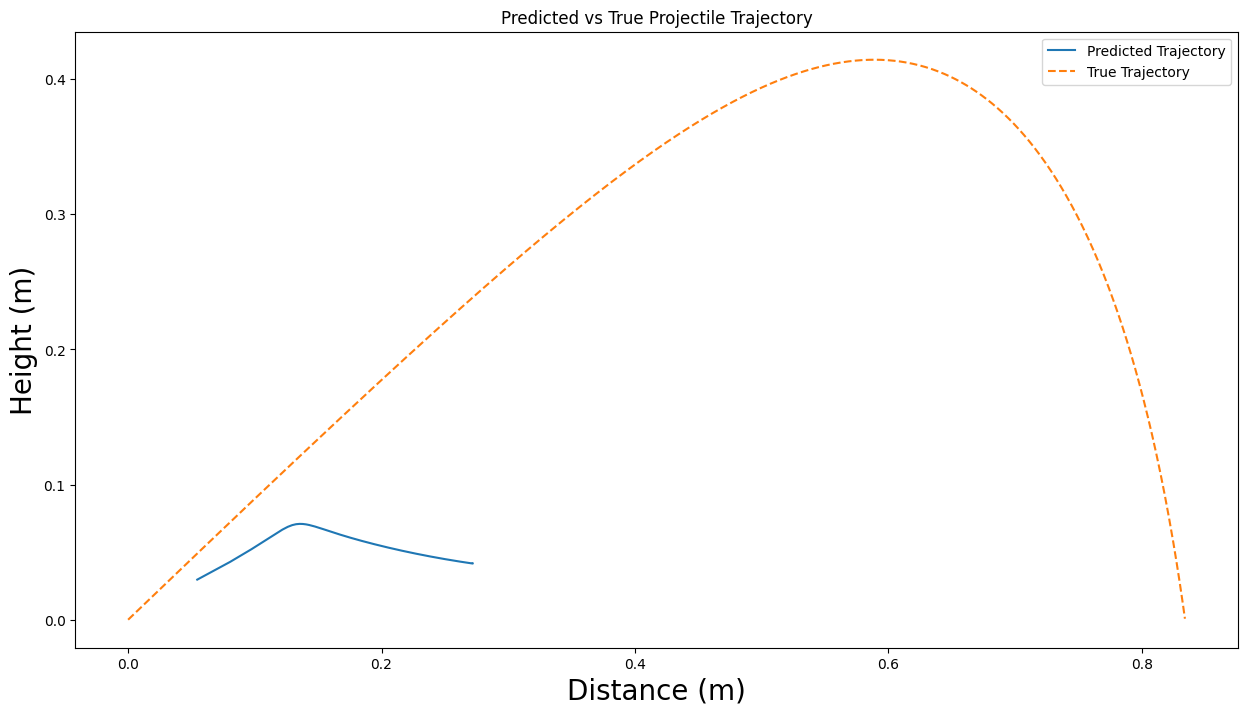

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(prediction[:, 0], prediction[:, 1], label='Predicted Trajectory')
plt.plot(y_test[:,0], y_test[:,1], label='True Trajectory', linestyle='dashed')

plt.xlabel('Distance (m)', fontsize = 20)
plt.ylabel('Height (m)', fontsize = 20)
plt.title('Predicted vs True Projectile Trajectory')
plt.legend()
plt.show()

<b> Reasons for Ineffectiveness </b>

- Predicting multiple future time points based only on the current state may lead to insufficient information, especially when the model needs to learn nonlinearities and complex interactions.
- Long-term predictions based solely on initial conditions are very challenging. Small prediction errors can accumulate over time, leading to significant inaccuracies.

## Lab 2: Projectile Motion with Air Resistance
- Input: Partial Trajectory (10 timesteps)
- Output: Next Position (1 timestep)

### Dataset Visualization

In [ ]:
X_train = np.load('/content/drive/MyDrive/ML_Colab/ML_data/01_projectile_Lab2_X_train.npy')
y_train = np.load('/content/drive/MyDrive/ML_Colab/ML_data/01_projectile_Lab2_y_train.npy')
X_test_15 = np.load('/content/drive/MyDrive/ML_Colab/ML_data/01_projectile_Lab2_X_test.npy')
y_test_15 = np.load('/content/drive/MyDrive/ML_Colab/ML_data/01_projectile_Lab2_y_test.npy')

Text(0, 0.5, 'Height (m)')

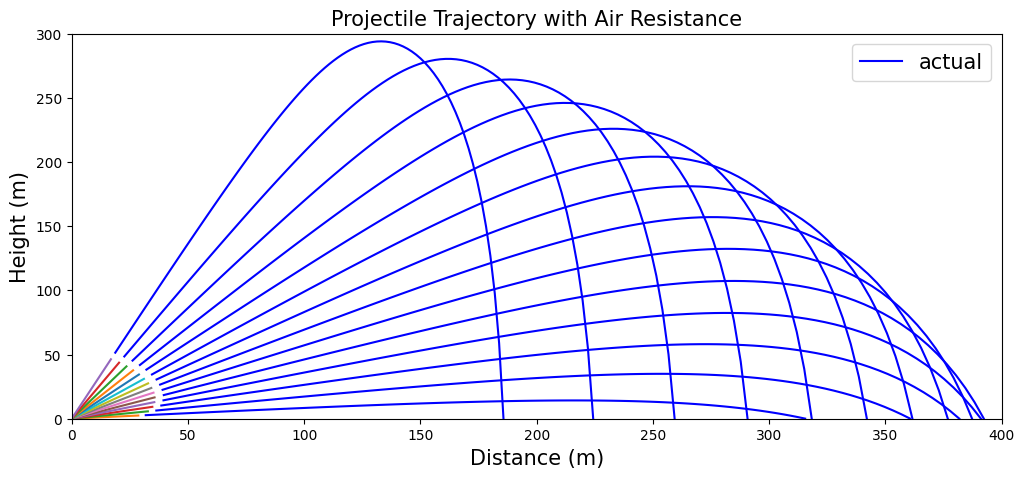

In [ ]:
plt.figure(figsize=(12,5))
for i in range(15):
    X_test = X_test_15[i]
    y_test = y_test_15[i]

    X_test_traj = X_test[0]
    y_test_traj = y_test.reshape(-1,2)
    plt.plot(X_test_traj[:,0], X_test_traj[:,1])
    plt.plot(y_test_traj[:,0], y_test_traj[:,1], label = 'actual', color = 'blue')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize = 15)
plt.xlim([0,400])
plt.ylim([0,300])
plt.title("Projectile Trajectory with Air Resistance", fontsize = 15)
plt.xlabel("Distance (m)", fontsize = 15)
plt.ylabel("Height (m)", fontsize = 15)

### LSTM Model Architecture

In [ ]:
# Build LSTM model with Keras
train_window = 10

model = Sequential()
model.add(LSTM(100, input_shape=(train_window, 2), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100))
model.add(Dense(2))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 100)           41200     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 2)                 202       
                                                                 
Total params: 131902 (515.24 KB)
Trainable params: 131902 (515.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
3/3 [==============================] - 3s 9ms/step - loss: 0.3408
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0803
Epoch 3/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0704
Epoch 4/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0279
Epoch 5/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0264
Epoch 6/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0347
Epoch 7/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0177
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0074
Epoch 9/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0120
Epoch 10/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 11/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 12/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 13/50
3/3 [==============================] - 0s 7ms/step - loss: 0.

### Rollout Prediction

<ipython-input-16-f8408670cb8f>:6: RuntimeWarning: invalid value encountered in divide
  test_data_normalized = (X_test - X_test.min(axis=(0,1))) / (X_test.max(axis=(0,1)) - X_test.min(axis=(0,1)))


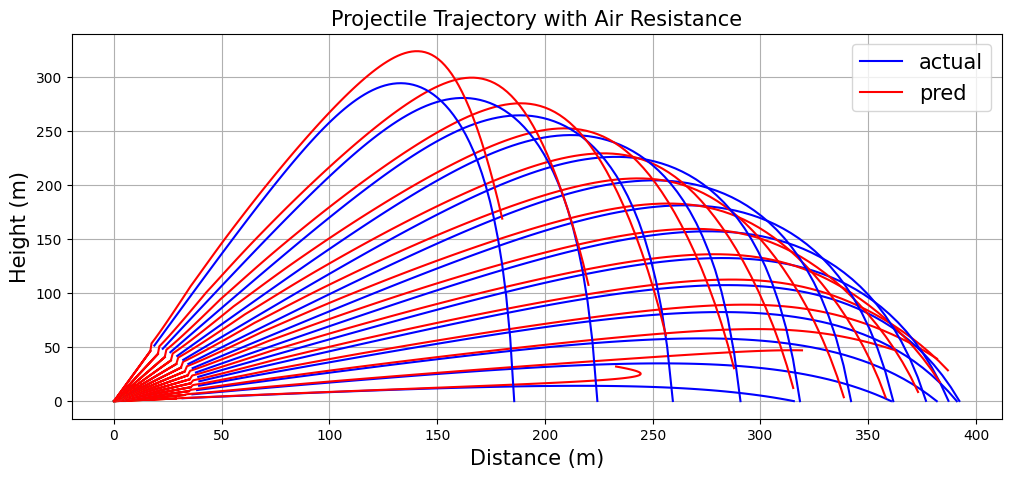

In [ ]:
plt.figure(figsize=(12,5))
for i in range(15):
    X_test = X_test_15[i]
    y_test = y_test_15[i]

    test_data_normalized = (X_test - X_test.min(axis=(0,1))) / (X_test.max(axis=(0,1)) - X_test.min(axis=(0,1)))

    test_seq = test_data_normalized[0]
    for j in range(90):
        pred = model.predict(test_seq[j:][np.newaxis], verbose = 0)
        test_seq = np.concatenate([test_seq, pred], axis = 0).squeeze()

    pred_traj = test_seq * (X_test.max(axis=(0,1)) - X_test.min(axis=(0,1))) + X_test.min(axis=(0,1))
    pred_traj = pred_traj[pred_traj[:,1]>=0]
    X_test_traj = X_test[0].reshape(-1,2)
    y_test_traj = y_test.reshape(-1,2)
    plt.plot(X_test_traj[:,0], X_test_traj[:,1])
    plt.plot(y_test_traj[:,0], y_test_traj[:,1], label = 'actual', color = 'blue')
    plt.plot(np.concatenate([X_test_traj[train_window-1,0][np.newaxis], pred_traj[:,0]], axis = 0),
             np.concatenate([X_test_traj[train_window-1,1][np.newaxis], pred_traj[:,1]], axis = 0), label = 'pred', color = 'red')
# plt.vlines(X_test_traj[:train_window,0][-1],0,np.max(y_test_traj[:,1])*1.1, color = 'red', linestyle='--')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize = 15)
plt.title("Projectile Trajectory with Air Resistance", fontsize = 15)
plt.xlabel("Distance (m)", fontsize = 15)
plt.ylabel("Height (m)", fontsize = 15)
plt.grid(True)
# plt.xlim([0,1])
# plt.ylim([0,1])


## Lab 3: Projectile Motion with Air Resistance (PINN)
- Physics-informed Neural Network (PINN)

<center>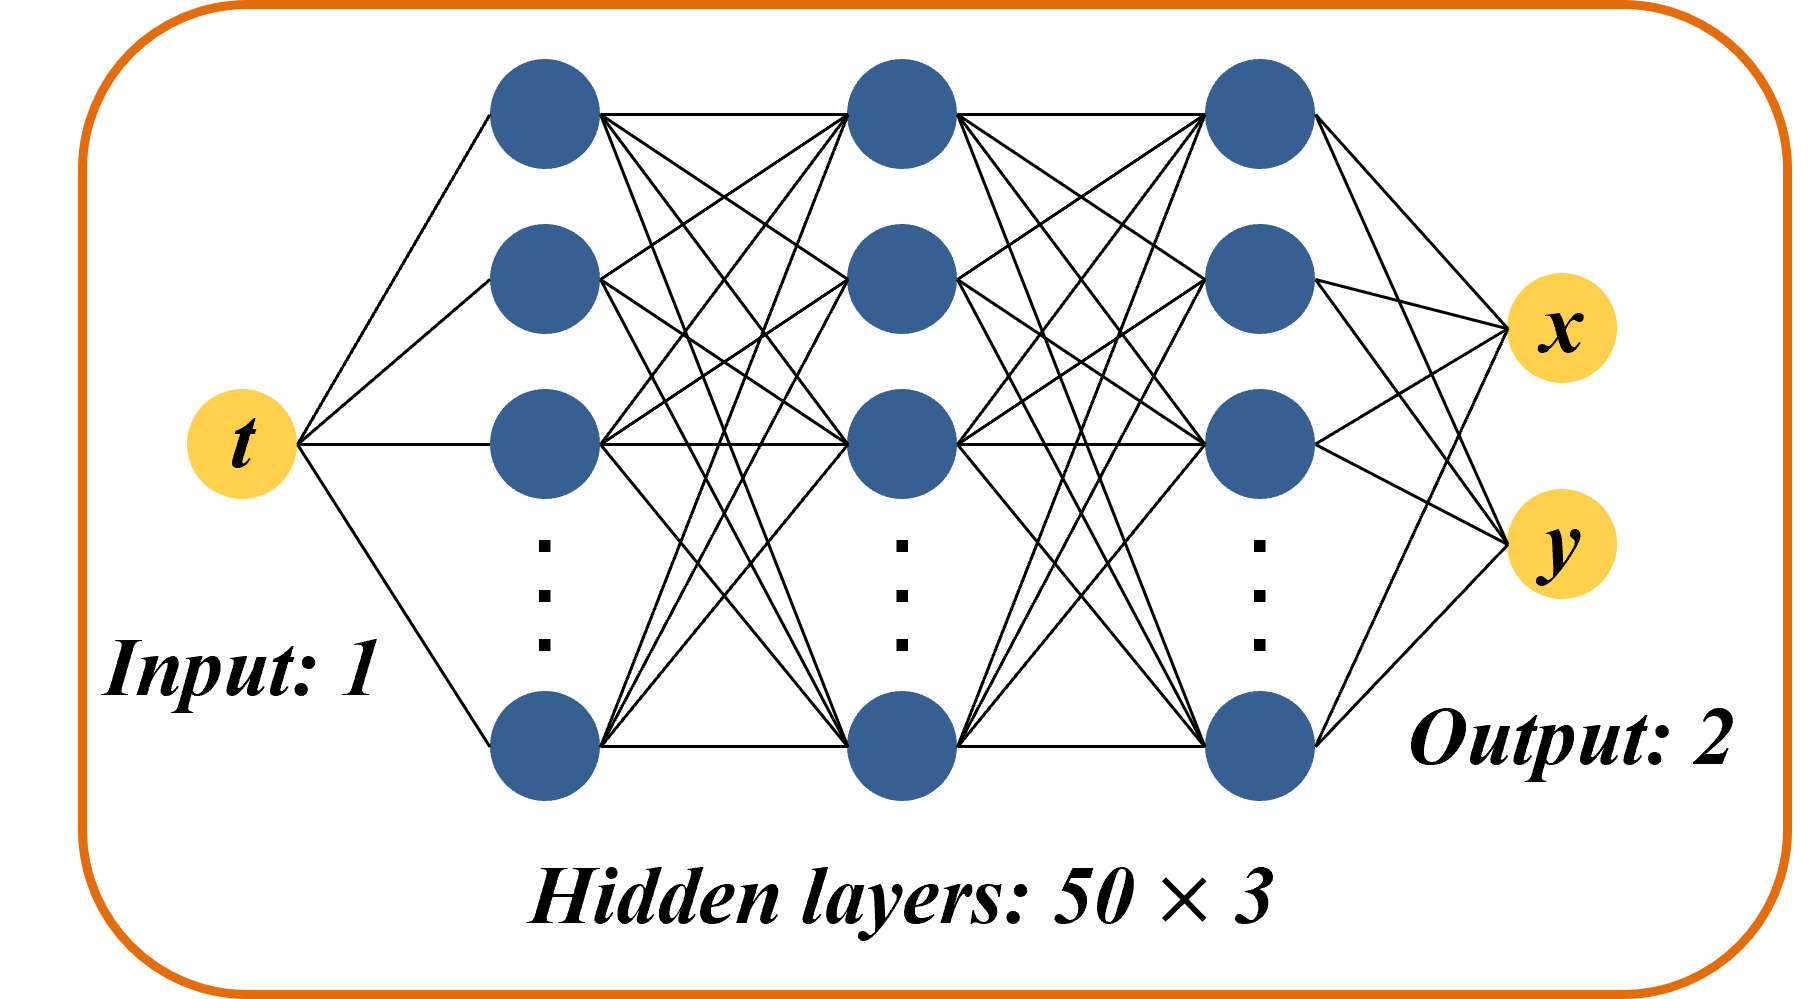

### Define the parameters

In [ ]:
g = 9.81
C_d = 0.47
rho = 1.225
A = 0.0042
m = 0.145

x0 = 0.0
y0 = 0.0
v0 = 500.0
theta = np.pi / 12  * 3
vx0 = v0 * np.cos(theta)
vy0 = v0 * np.sin(theta)

### Define Network and hyper-parameters

In [ ]:
PINN = Sequential([
    Input((1,)),
    Dense(units=50, activation='tanh'),
    Dense(units=50, activation='tanh'),
    Dense(units=50, activation='tanh'),
    Dense(units=2),
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

PINN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 50)                100       
                                                                 
 dense_8 (Dense)             (None, 50)                2550      
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 dense_10 (Dense)            (None, 2)                 102       
                                                                 
Total params: 5302 (20.71 KB)
Trainable params: 5302 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10, 100)           41200     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
Total params: 131902 (515.24 KB)
Trainable params: 131902 (515.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Define ODE system

- ODE loss:

<br>

$$
L_{\text{ODE}} = \frac{1}{n}\sum_{i=1}^{n} \left[\frac{d^2 NN_x(t_i)}{dt^2} + \frac{1}{2m} C_d \rho A \left( \frac{d NN_x(t_i)}{dt} \right)^2 \right]^2 + \left[\frac{d^2 NN_y(t_i)}{dt^2} + g + \frac{1}{2m} C_d \rho A \left( \frac{d NN_y(t_i)}{dt} \right)^2 \right]^2
$$

- Initial condition loss:

<br>

$$
L_{\text{IC}} = \left[NN_x(0) - x_0\right]^2 + \left[NN_y(0) - y_0\right]^2 + \left[\frac{dNN_x(0)}{dt} - v_{x0}\right]^2 + \left[\frac{dNN_y(0)}{dt} - v_{y0}\right]^2
$$

- Total loss:

<br>

$$
L_{\text{Total}} = L_{\text{ODE}} + L_{\text{IC}}
$$


In [ ]:
def ode_system(model, t, x0, y0, vx0, vy0):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)
        pred = model(t)*300
        x, y = pred[:, 0:1], pred[:, 1:2]

        x_t = tape.gradient(x, t)
        y_t = tape.gradient(y, t)
        x_tt = tape.gradient(x_t, t)
        y_tt = tape.gradient(y_t, t)

    v = tf.sqrt(x_t**2 + y_t**2)

    ode_loss_x = x_tt + (0.5 * C_d * rho * A * x_t * v) / m
    ode_loss_y = y_tt + g + (0.5 * C_d * rho * A * y_t * v) / m

    IC_loss_x = x[0] - x0
    IC_loss_y = y[0] - y0
    IC_loss_vx = x_t[0] - vx0
    IC_loss_vy = y_t[0] - vy0

    ode_loss = tf.reduce_mean(tf.square(ode_loss_x)) + tf.reduce_mean(tf.square(ode_loss_y))
    IC_loss = tf.square(IC_loss_x)+tf.square(IC_loss_y)+tf.square(IC_loss_vx)+tf.square(IC_loss_vy)

    total_loss = ode_loss + IC_loss

    return  total_loss

### Train & Prediction

In [ ]:
t = np.linspace(0, 15, 1000).reshape(-1, 1)
t = tf.convert_to_tensor(t, dtype=tf.float32)

epochs = 10000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        current_loss = ode_system(PINN, t, x0, y0, vx0, vy0)
    gradients = tape.gradient(current_loss, PINN.trainable_variables)
    optimizer.apply_gradients(zip(gradients, PINN.trainable_variables))
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {current_loss.numpy()}")

Epoch 0: Loss = [228597.1]
Epoch 1000: Loss = [64.662315]
Epoch 2000: Loss = [21.868252]
Epoch 3000: Loss = [3.251353]
Epoch 4000: Loss = [1.6645683]
Epoch 5000: Loss = [5.4033685]
Epoch 6000: Loss = [0.97814506]
Epoch 7000: Loss = [0.8127919]
Epoch 8000: Loss = [0.8252511]
Epoch 9000: Loss = [0.59589815]


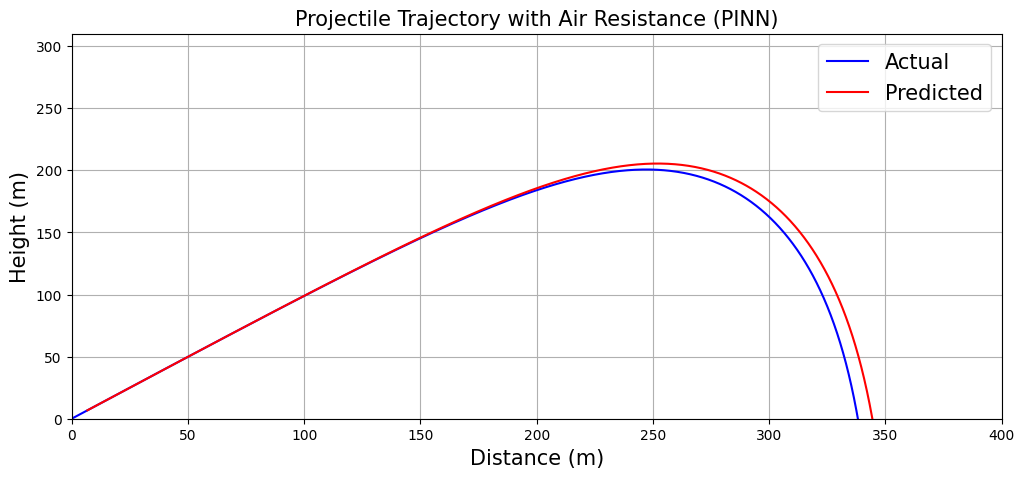

In [ ]:
t_test = np.linspace(0, 20, 1000).reshape(-1, 1)
t_test = tf.convert_to_tensor(t_test, dtype=tf.float32)

def true_trajectory_with_drag(dt=0.01):
    t = 0
    x, y = [0], [0]
    vx, vy = vx0, vy0

    while y[-1] >= 0:
        v = np.sqrt(vx**2 + vy**2)
        ax = - (0.5 * C_d * rho * A * v * vx) / m
        ay = - g - (0.5 * C_d * rho * A * v * vy) / m

        vx += ax * dt
        vy += ay * dt

        x.append(x[-1] + vx * dt)
        y.append(y[-1] + vy * dt)
        t += dt
    return np.array(x), np.array(y)

x_true, y_true = true_trajectory_with_drag()

pred = PINN(t_test)*300
x_pred, y_pred = pred[:, 0].numpy(), pred[:, 1].numpy()

valid_indices = y_pred >= 0
x_pred = x_pred[valid_indices]
y_pred = y_pred[valid_indices]

plt.figure(figsize=(12,5))
plt.plot(x_true, y_true, 'blue', label='Actual')
plt.plot(x_pred, y_pred, label='Predicted', color='red')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize = 15)
plt.title("Projectile Trajectory with Air Resistance (PINN)", fontsize = 15)
plt.xlabel("Distance (m)", fontsize = 15)
plt.ylabel("Height (m)", fontsize = 15)
plt.grid(True)
plt.xlim([0,400])
plt.ylim([0,310])
plt.show()

# Spring Mass System

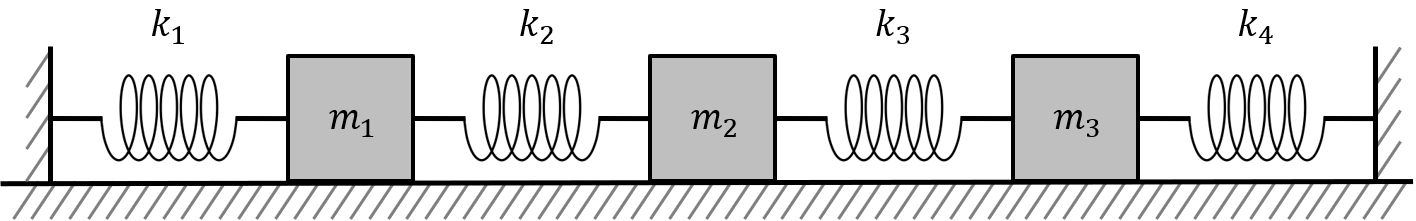

## Lab 1: Coupled Spring Mass ODE System

The provided diagram depicts a system consisting of three masses ($m_1$, $m_2$, and $m_3$) connected by springs in a linear arrangement. The springs are connected to rigid walls at both ends. To analyze the dynamics of this system, we need to derive the Partial Differential Equations (PDEs) governing the motion of each mass.

- $m_1$, $m_2$, and $m_3$ are masses connected in series with springs.
- The springs have stiffness constants $k$.
- The system is attached to rigid walls on both ends.
- The displacements of the masses are denoted as $x_1(t)$, $x_2(t)$, and $x_3(t)$ respectively.

<b> Equations of Motion </b>

$$
\begin{cases}
m_1 \ddot{x}_1(t) &= -k_1 x_1(t) + k_2 \left( x_2(t) - x_1(t) \right), \\
m_2 \ddot{x}_2(t) &= -k_2 \left( x_2(t) - x_1(t) \right) + k_3 \left( x_3(t) - x_2(t) \right), \\
m_3 \ddot{x}_3(t) &= -k_3 \left( x_3(t) - x_2(t) \right) - k_4 x_3(t).
\end{cases}
$$

<b> Parameters </b>

$$
\begin{align*}
[m_1, m_2, m_3] &= [1.0, 1.0, 1.0], \\
[k_1, k_2, k_3, k_4] &= [2.0, 1.0, 1.0, 2.0],
\end{align*}
$$

<b> Initial Conditions </b>

$$
\begin{align*}
[x_1(0), x_2(0), x_3(0)] &= [1.0, 0.5, 0.0], \\
[\dot{x}_1(0), \dot{x}_2(0), \dot{x}_3(0)] &= [0.0, 0.0, 0.0].
\end{align*}
$$


- Input: Partial Trajectory (10 timesteps)
- Output: Next Position (1 timestep)

- Train (0 seconds to 10 seconds)
- Test (0 seconds to 20 seconds)

In [ ]:
X_train = np.load('/content/drive/MyDrive/ML_Colab/ML_data/02_SpringMass_Lab1_X_train.npy')
y_train = np.load('/content/drive/MyDrive/ML_Colab/ML_data/02_SpringMass_Lab1_y_train.npy')

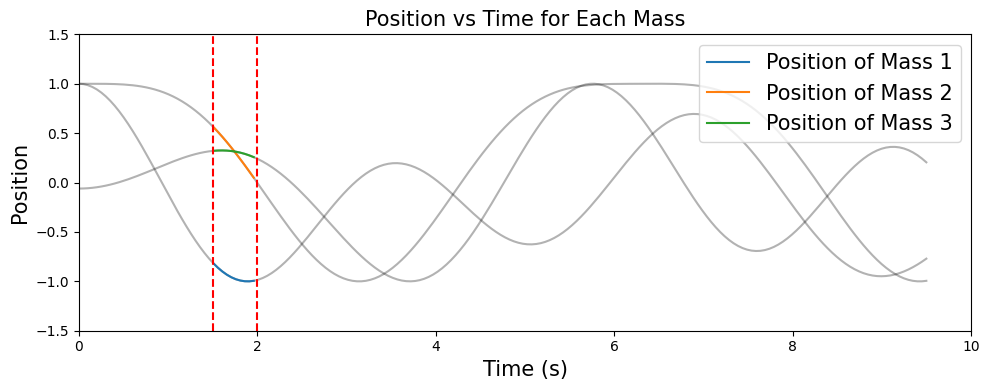

In [ ]:
t_span = [0, 10]
t_eval = np.linspace(t_span[0], t_span[1], 200)[:190]

fig, axs = plt.subplots(1, 1, figsize=(10, 4))

# Position graphs for each mass
for i in range(3):
    axs.plot(t_eval,X_train[:,0,i], alpha = 0.3, color = 'black')
    axs.plot(t_eval[30:40], X_train[30:40,0,i], label=f'Position of Mass {i+1}')
axs.set_xlabel('Time (s)', fontsize = 15)
axs.set_ylabel('Position', fontsize = 15)
axs.set_title('Position vs Time for Each Mass', fontsize = 15)
axs.legend(fontsize = 15, loc='upper right')
axs.vlines(1.5, -1.5, 1.5, color='red',linestyle='--')
axs.vlines(2, -1.5, 1.5, color='red',linestyle='--')

plt.xlim([0,10])
plt.ylim([-1.5,1.5])
plt.tight_layout()
plt.show()

### LSTM Model Architecture

In [ ]:
# Build LSTM model with Keras
model = Sequential()
model.add(LSTM(100, input_shape=(None, 3), return_sequences=True))
model.add(LSTM(100, activation = 'tanh'))
model.add(Dense(100, activation = 'tanh'))
model.add(Dense(3, activation = 'tanh'))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, None, 100)         41600     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 3)                 303       
                                                                 
Total params: 132403 (517.20 KB)
Trainable params: 132403 (517.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
6/6 [==============================] - 3s 7ms/step - loss: 0.2303
Epoch 2/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0668
Epoch 3/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0543
Epoch 4/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0423
Epoch 5/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0360
Epoch 6/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0298
Epoch 7/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0277
Epoch 8/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0257
Epoch 9/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0234
Epoch 10/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0223


### Evaluation & Visualization

In [ ]:
data_test = np.load('/content/drive/MyDrive/ML_Colab/ML_data/02_SpringMass_Lab1_test.npy')

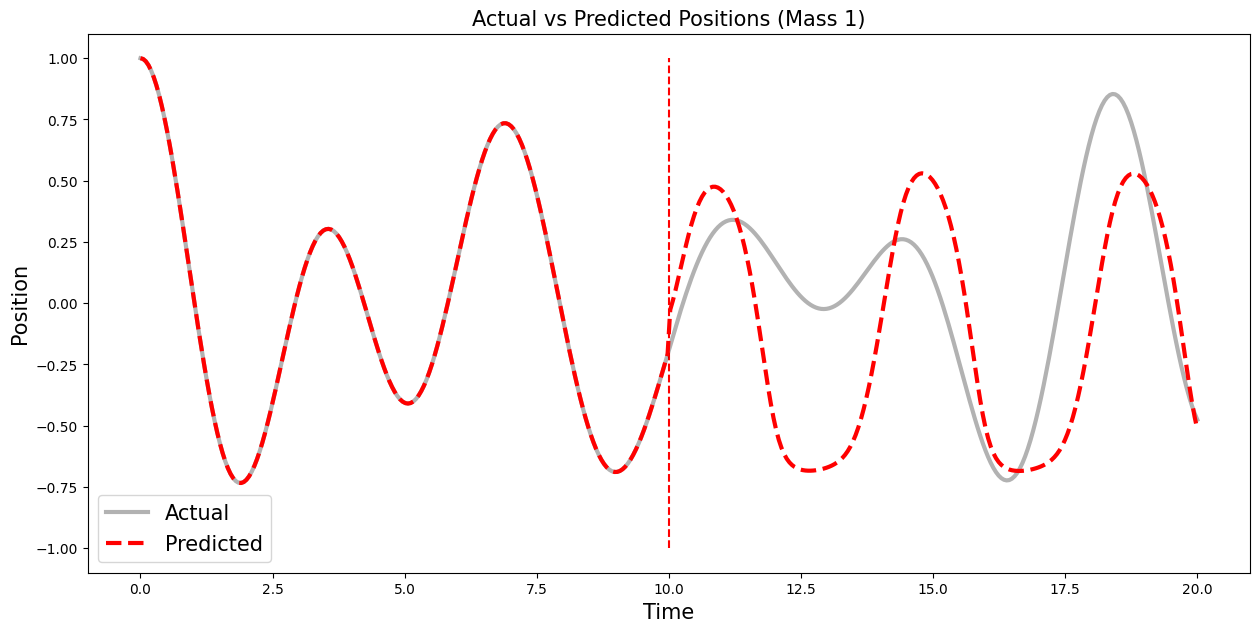

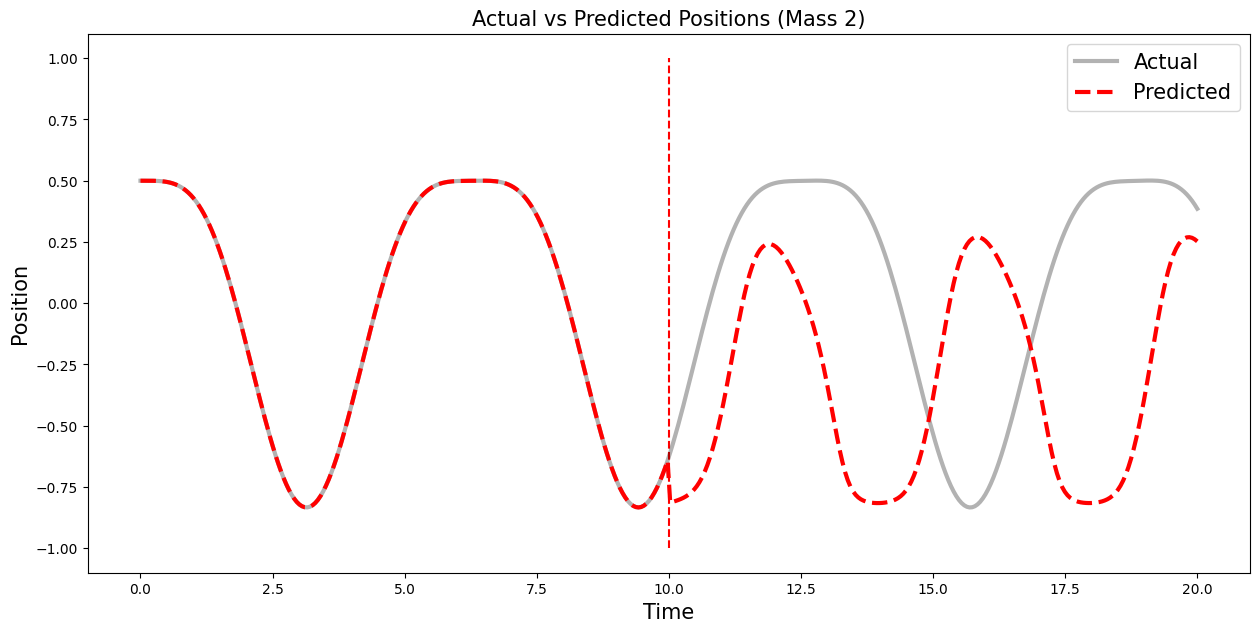

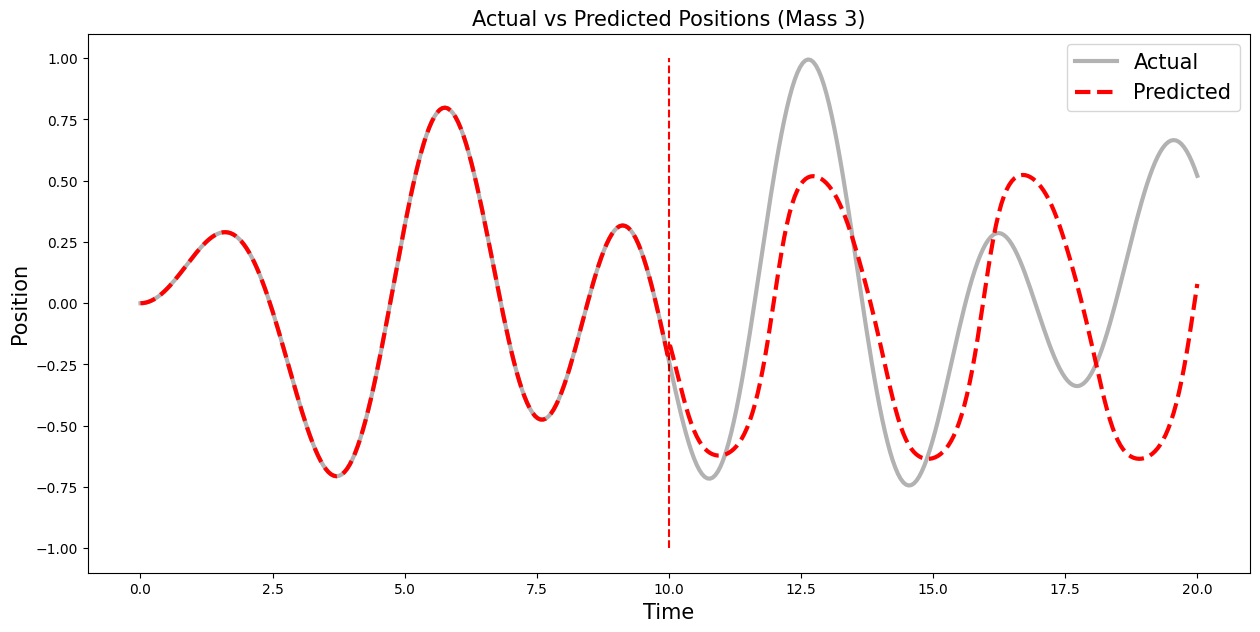

In [ ]:
t_span_test = [0, 20]
t_eval_test = np.linspace(t_span_test[0], t_span_test[1], 400)

test_data_normalized = (data_test-data_test.min(axis=0))/(data_test.max(axis=0)-data_test.min(axis=0))
test_data_normalized = test_data_normalized*2 - 1   # -1 ~ 1 normalization

test_seq = test_data_normalized[:200]
for i in range(200):
    pred = model.predict(test_seq[i:][np.newaxis], verbose = 0)
    test_seq = np.concatenate([test_seq, pred], axis = 0).squeeze()
pred_traj = (test_seq+1)/2*(data_test.max(axis=0)-data_test.min(axis=0))+data_test.min(axis=0)

for i in range(3):
    plt.figure(figsize=(15,7))
    plt.vlines(10,-1,1, color = 'red', linestyle='--')
    plt.plot(t_eval_test, data_test[:,i], label='Actual', linewidth = 3, color='black',alpha=0.3)
    plt.plot(t_eval_test, pred_traj[:,i],
             label='Predicted', linestyle='--', linewidth =3, color = 'red')
    plt.title('Actual vs Predicted Positions (Mass {})'.format(i+1), fontsize = 15)
    plt.xlabel('Time', fontsize = 15)
    plt.ylabel('Position', fontsize = 15)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), fontsize = 15)
    plt.show()

## Lab 2: Coupled Spring Mass ODE System (PINN)

### Define Parameters

In [ ]:
#!pip install deepxde

In [ ]:
import deepxde as dde

from deepxde.backend.set_default_backend import set_default_backend
set_default_backend("pytorch")

m1 = 1.0
m2 = 1.0
m3 = 1.0

k1 = 2.0
k2 = 1.0
k3 = 1.0
k4 = 2.0

d1_0 = 1
d2_0 = 0
d3_0 = 0

v1_0 = 0.0
v2_0 = 0.0
v3_0 = 0.0

t_max = 5

Setting the default backend to "pytorch". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


### Define PDE with Boundary and Initial Conditions

In [ ]:
def dy(t, x):
    return dde.grad.jacobian(x, t)

def pde(t, x):
    x_1 = x[:, 0:1]
    x_2 = x[:, 1:2]
    x_3 = x[:, 2:3]

    dx1_tt = dde.grad.hessian(x, t, i=0,j=0,component=0)
    dx2_tt = dde.grad.hessian(x, t, i=0,j=0,component=1)
    dx3_tt = dde.grad.hessian(x, t, i=0,j=0,component=2)

    pde1 = m1 * dx1_tt + k1 * (x_1) - k2 * (x_2 - x_1)
    pde2 = m2 * dx2_tt + k2 * (x_2 - x_1) - k3 * (x_3 - x_2)
    pde3 = m3 * dx3_tt + k3 * (x_3 - x_2) - k4 * (x_3)

    return [pde1, pde2, pde3]

In [ ]:
def boundary_init(t, on_boundary):
    return on_boundary and np.isclose(t[0], 0)

### Define Geometry, Implement Boundary Condition

In [ ]:
geom = dde.geometry.Interval(0, t_max)

init_d1 = dde.icbc.PointSetBC(np.array([0]), np.array([d1_0]).reshape(-1, 1), component=0)
init_d2 = dde.icbc.PointSetBC(np.array([0]), np.array([d2_0]).reshape(-1, 1), component=1)
init_d3 = dde.icbc.PointSetBC(np.array([0]), np.array([d3_0]).reshape(-1, 1), component=2)

init_v1 = dde.OperatorBC(geom, lambda x, y, _: dy(x, y[:, 0:1]), boundary_init)
init_v2 = dde.OperatorBC(geom, lambda x, y, _: dy(x, y[:, 1:2]), boundary_init)
init_v3 = dde.OperatorBC(geom, lambda x, y, _: dy(x, y[:, 2:3]), boundary_init)

In [ ]:
data = dde.data.PDE(
    geom,
    pde,
    [init_d1, init_d2, init_d3, init_v1, init_v2, init_v3],
    num_domain=2000,
    num_boundary=100,
    num_test=1000
)

### Define Network and Hyper-parameters

<center>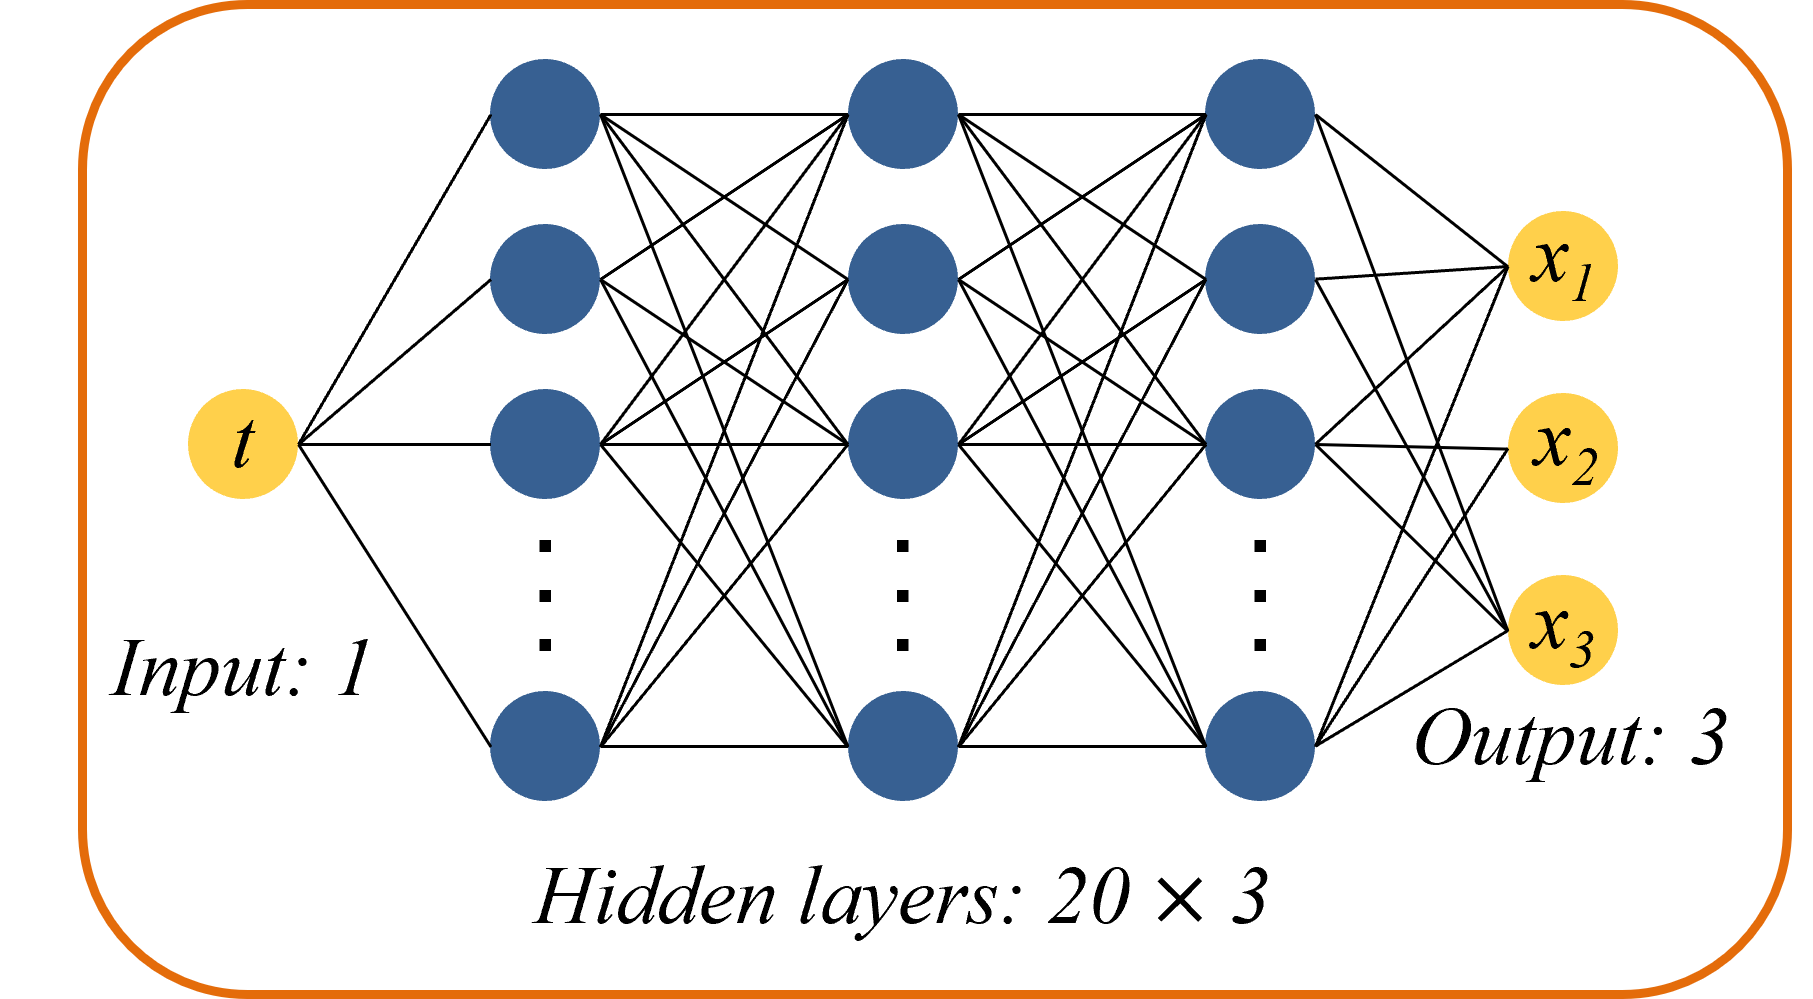

In [ ]:
layer_size = [1] + [20] * 3 + [3]
activation = "tanh"
initializer = "Glorot uniform"

net = dde.maps.FNN(layer_size, activation, initializer)
model = dde.Model(data, net)
model.compile("adam", lr=1e-3)

Compiling model...
Building feed-forward neural network...
'build' took 0.054839 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 1.156510 s



Training model...

Step      Train loss                                                                                    Test loss                                                                                     Test metric
0         [6.63e+00, 8.84e-02, 7.33e-02, 1.00e+00, 0.00e+00, 0.00e+00, 3.55e-01, 3.86e-02, 1.97e-01]    [6.62e+00, 8.88e-02, 7.69e-02, 1.00e+00, 0.00e+00, 0.00e+00, 3.55e-01, 3.86e-02, 1.97e-01]    []  
1000      [1.46e-01, 2.69e-02, 4.07e-03, 9.98e-02, 1.09e-02, 1.24e-03, 5.45e-04, 2.13e-05, 1.42e-04]    [1.48e-01, 2.82e-02, 3.77e-03, 9.98e-02, 1.09e-02, 1.25e-03, 5.45e-04, 2.13e-05, 1.42e-04]    []  
2000      [7.76e-02, 3.94e-02, 4.21e-03, 2.68e-02, 4.10e-03, 9.52e-04, 2.52e-04, 5.06e-05, 5.67e-04]    [8.01e-02, 3.52e-02, 3.73e-03, 2.69e-02, 4.12e-03, 9.43e-04, 2.52e-04, 5.06e-05, 5.67e-04]    []  
3000      [4.80e-03, 2.88e-03, 1.18e-03, 8.45e-04, 2.38e-04, 7.33e-04, 1.23e-06, 2.18e-05, 3.16e-04]    [4.62e-03, 2.75e-03, 1.19e-03, 8.18e-04, 2.31e-04, 7.06e-0

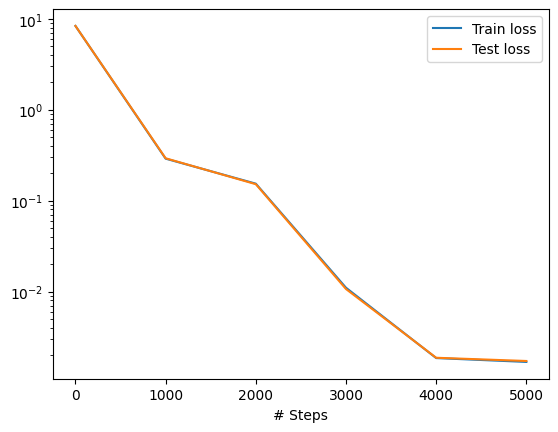

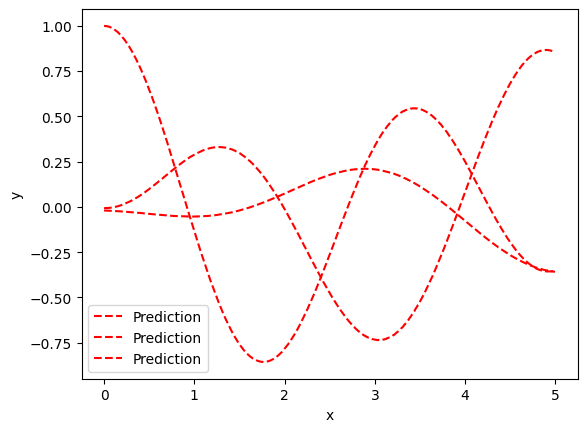

In [ ]:
losshistory, train_state = model.train(epochs=5000)
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

### Train More (L-BFGS Optimizer)

Compiling model...
'compile' took 0.793213 s

Training model...

Step      Train loss                                                                                    Test loss                                                                                     Test metric
5000      [7.77e-05, 1.59e-04, 6.48e-04, 3.76e-06, 4.00e-05, 3.91e-04, 1.32e-06, 3.66e-05, 3.25e-04]    [8.84e-05, 1.73e-04, 6.31e-04, 4.01e-06, 4.48e-05, 4.18e-04, 1.32e-06, 3.66e-05, 3.25e-04]    []  
5034      [6.43e-05, 1.24e-04, 6.53e-04, 4.03e-06, 3.91e-05, 4.04e-04, 1.20e-06, 3.62e-05, 3.15e-04]    [6.28e-05, 1.38e-04, 6.31e-04, 4.19e-06, 4.63e-05, 4.25e-04, 1.20e-06, 3.62e-05, 3.15e-04]    []  

Best model at step 5034:
  train loss: 1.64e-03
  test loss: 1.66e-03
  test metric: []

'train' took 5.355900 s



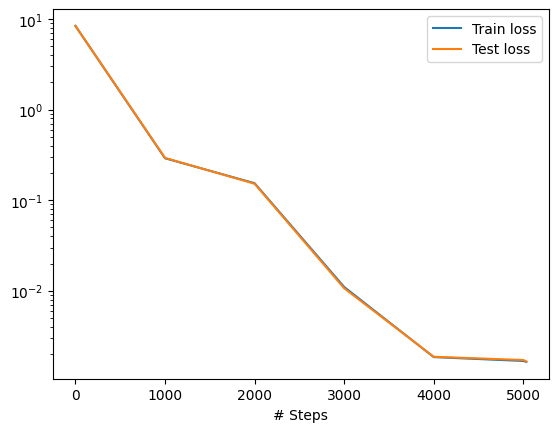

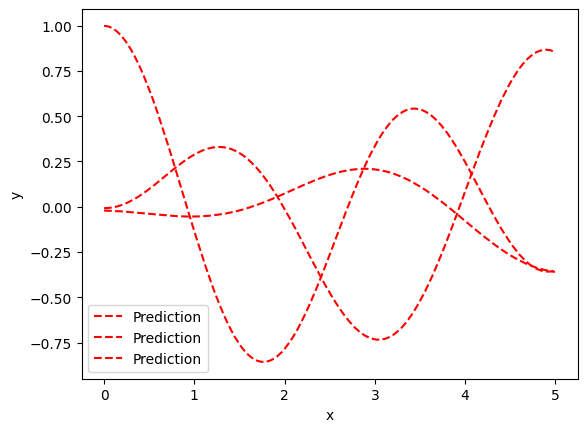

In [ ]:
dde.optimizers.config.set_LBFGS_options(maxiter=500)
model.compile("L-BFGS")
losshistory, train_state = model.train()

dde.saveplot(losshistory, train_state, issave = False, isplot = True)

### Plot Results

In [ ]:
from scipy.integrate import odeint

def vectorfield(w, t, p):
    x1, y1, x2, y2, x3, y3 = w
    m1, m2, m3, k1, k2, k3, k4 = p

    f = [y1, (-k1 * (x1) + k2 * (x2 - x1)) / m1, y2, (-k2 * (x2 - x1) + k3 * (x3 - x2)) / m2,
         y3,(-k3 * (x3 - x2) - k4 * (x3)) / m3]
    return f

t = geom.random_points(5000)
t[:,0].sort()

p = [m1, m2, m3, k1, k2, k3, k4]
w0 = [d1_0, v1_0, d2_0, v2_0, d3_0, v3_0]

wsol = odeint(vectorfield, w0, t[:,0], args=(p,), atol=1.0e-8, rtol=1.0e-6)

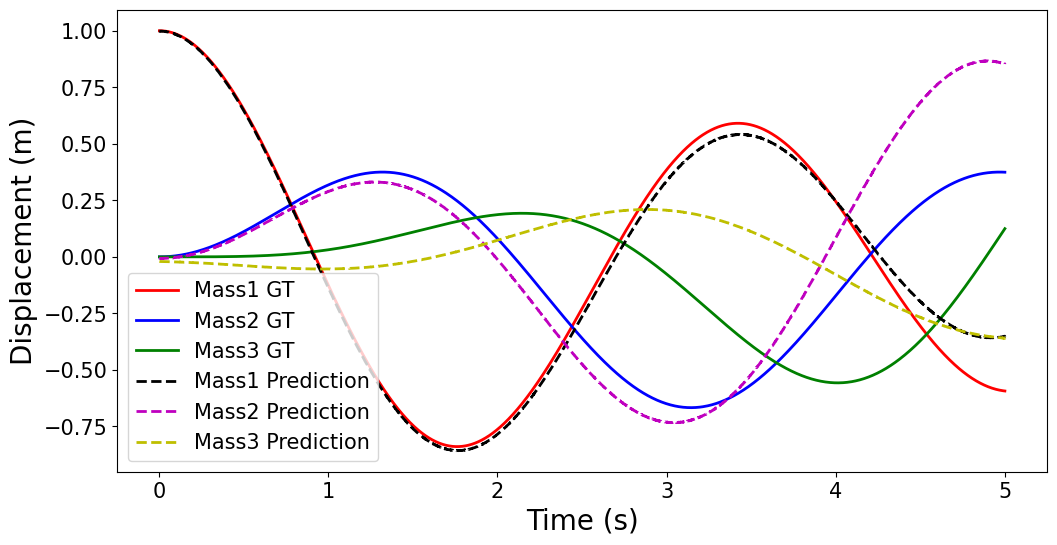

In [ ]:
result = model.predict(t)

usol1 = np.array(result[:, 0])
usol2 = np.array(result[:, 1])
usol3 = np.array(result[:, 2])

plt.figure(figsize=(12, 6))
plt.plot(t, wsol[:, 0], alpha=1, label='Mass1 GT', c='r', lw=2)
plt.plot(t, wsol[:, 2], alpha=1, label='Mass2 GT', c='b', lw=2)
plt.plot(t, wsol[:, 4], alpha=1, label='Mass3 GT', c='g', lw=2)
plt.plot(t, usol1, alpha=1, label='Mass1 Prediction', linestyle='dashed', c='k', lw=2)
plt.plot(t, usol2, alpha=1, label='Mass2 Prediction', linestyle='dashed', c='m', lw=2)
plt.plot(t, usol3, alpha=1, label='Mass3 Prediction', linestyle='dashed', c='y', lw=2)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Displacement (m)', fontsize=20)
plt.show()

## Lab 3: LSTM with Physics

- Input: Partial Trajectory (10 timesteps)
- Output: Next Positions (3 timestep)

- Train (0 seconds to 5 seconds)
- Test (0 seconds to 10 seconds)

### Parameters

In [ ]:
masses = np.array([1.0, 1.0, 1.0])
spring_constants = np.array([2.0, 1.0, 1.0, 2.0])

t_span = [0, 5]
t_eval = np.linspace(t_span[0], t_span[1], 100)

t_span_test = [0, 10]
t_eval_test = np.linspace(t_span_test[0], t_span_test[1], 200)

### Dataset

In [ ]:
X_train = np.load('/content/drive/MyDrive/ML_Colab/ML_data/02_SpringMass_Lab3_X_train.npy')
y_train = np.load('/content/drive/MyDrive/ML_Colab/ML_data/02_SpringMass_Lab3_y_train.npy')

### Loss Function Description

**Mean Squared Error (MSE) Loss:**

$$
L_{\text{MSE}} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2
$$

**Physics-Informed Loss:**

1. Acceleration Prediction:

$$
a_{\text{pred}} = \frac{y_{\text{pred},2} - 2y_{\text{pred},1} + y_{\text{pred},0}}{\Delta t^2}
$$

2. Physics Loss for Each Mass:

$$
L_{\text{physics},1} = a_{\text{pred},1} - \left( \frac{-k_1 x_1 + k_2 (x_2 - x_1)}{m_1} \right)
$$

$$
L_{\text{physics},2} = a_{\text{pred},2} - \left( \frac{-k_2 (x_2 - x_1) + k_3 (x_3 - x_2)}{m_2} \right)
$$

$$
L_{\text{physics},3} = a_{\text{pred},3} - \left( \frac{-k_3 (x_3 - x_2) - k_4 x_3}{m_3} \right)
$$

3. Combined Physics-Informed Loss:

$$
L_{\text{physics}} = \frac{1}{n} \sum_{i=1}^{n} \left( L_{\text{physics},1}^2 + L_{\text{physics},2}^2 + L_{\text{physics},3}^2 \right)
$$

**Total Loss:**

$$
L_{\text{total}} = L_{\text{MSE}} + \lambda \cdot L_{\text{physics}}
$$

### LSTM with Physics Model

In [ ]:
from tensorflow.keras import backend as K

def PhysicsGuidedLoss(y_true, y_pred):
    # Loss 1
    mse_loss = K.mean((y_true-y_pred)**2)

    # Loss 2
    delta_t = t_eval[1]

    a_pred = (y_pred[:,2]-2*y_pred[:,1]+y_pred[:,0]) / (delta_t**2)

    x1_pred, x2_pred, x3_pred = y_pred[:, :, 0], y_pred[:, :, 1], y_pred[:, :, 2]

    physics_loss_1 = a_pred[:, np.newaxis, 0] - (-spring_constants[0] * x1_pred + spring_constants[1] * (x2_pred - x1_pred)) / masses[0]
    physics_loss_2 = a_pred[:, np.newaxis, 1] - (-spring_constants[1] * (x2_pred - x1_pred) + spring_constants[2] * (x3_pred - x2_pred)) / masses[1]
    physics_loss_3 = a_pred[:, np.newaxis, 2] - (-spring_constants[2] * (x3_pred - x2_pred) - spring_constants[3] * x3_pred) / masses[2]

    physics_loss = tf.reduce_mean(tf.square(physics_loss_1) + tf.square(physics_loss_2) + tf.square(physics_loss_3))

    # Total Loss
    total_loss = mse_loss + physics_loss*1e-4

    return total_loss

In [ ]:
# Build LSTM model with Keras
model = Sequential()
model.add(LSTM(100, input_shape=(10, 3), return_sequences=True))
model.add(LSTM(100, activation = 'tanh'))
model.add(Dense(100, activation = 'tanh'))
model.add(Dense(9, activation = 'tanh'))
model.add(Reshape((3,3)))

model.compile(optimizer='adam', loss=PhysicsGuidedLoss)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 100)           41600     
                                                                 
 lstm_9 (LSTM)               (None, 100)               80400     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 9)                 909       
                                                                 
 reshape_1 (Reshape)         (None, 3, 3)              0         
                                                                 
Total params: 133009 (519.57 KB)
Trainable params: 133009 (519.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Train on 88 samples
Epoch 1/100
88/88 [==============================] - 1s 9ms/sample - loss: 0.9754
Epoch 2/100
88/88 [==============================] - 0s 417us/sample - loss: 0.6618
Epoch 3/100
88/88 [==============================] - 0s 508us/sample - loss: 0.5806
Epoch 4/100
88/88 [==============================] - 0s 442us/sample - loss: 0.5336
Epoch 5/100
88/88 [==============================] - 0s 471us/sample - loss: 0.4551
Epoch 6/100
88/88 [==============================] - 0s 506us/sample - loss: 0.4595
Epoch 7/100
88/88 [==============================] - 0s 437us/sample - loss: 0.4254
Epoch 8/100
88/88 [==============================] - 0s 407us/sample - loss: 0.3909
Epoch 9/100
88/88 [==============================] - 0s 404us/sample - loss: 0.3929
Epoch 10/100
88/88 [==============================] - 0s 433us/sample - loss: 0.3657
Epoch 11/100
88/88 [==============================] - 0s 424us/sample - loss: 0.3467
Epoch 12/100
88/88 [==============================] - 0s

### Evaluation & Visualization

In [ ]:
data_test = np.load('/content/drive/MyDrive/ML_Colab/ML_data/02_SpringMass_Lab3_test.npy')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


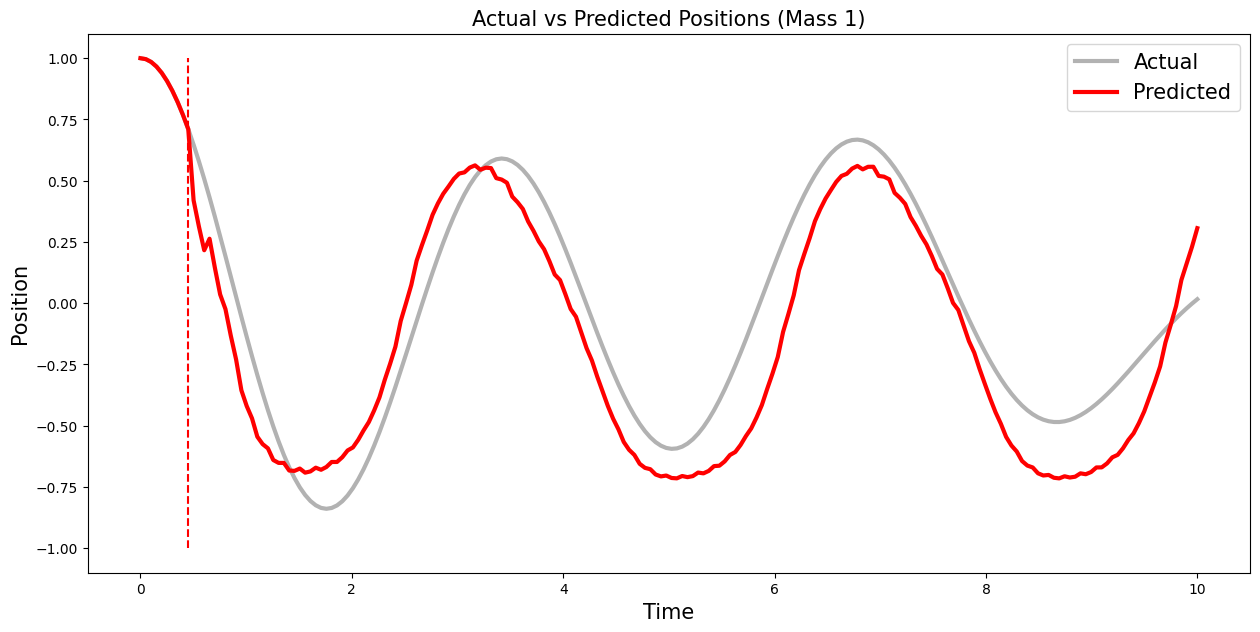

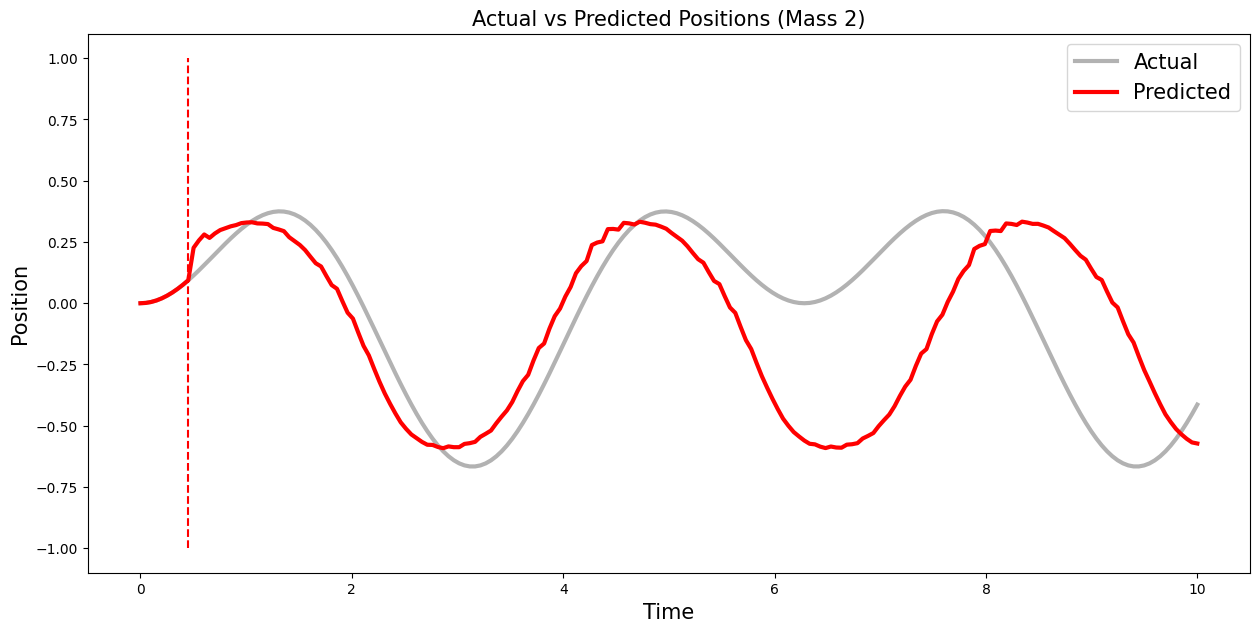

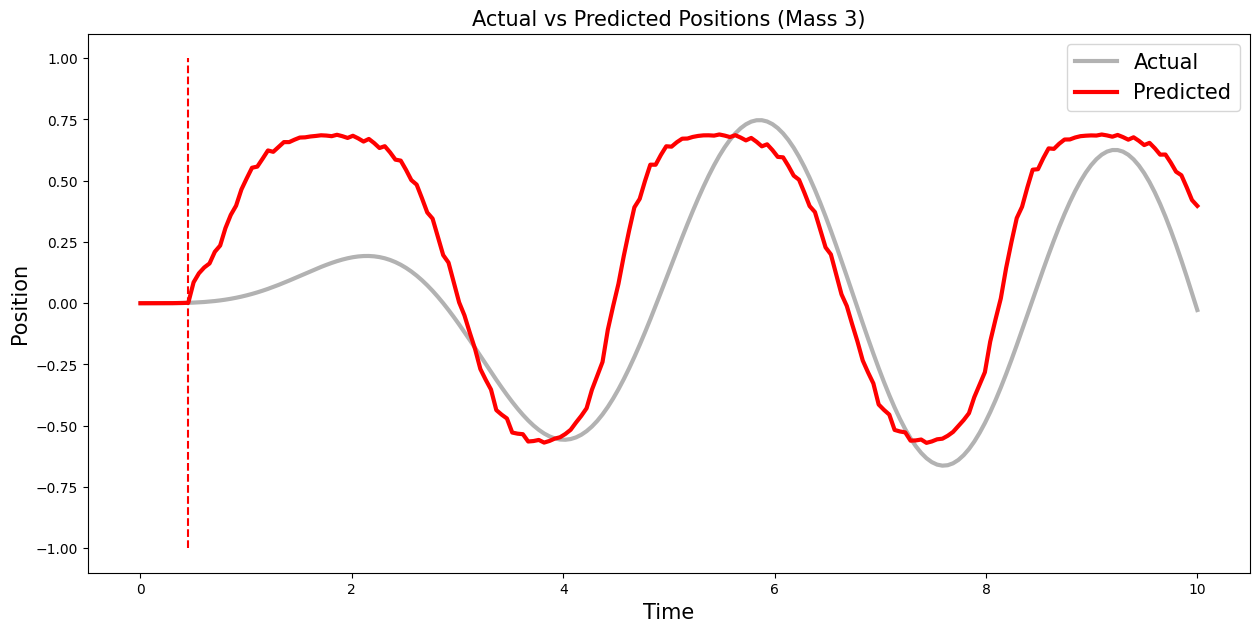

In [ ]:
test_data_normalized = (data_test-data_test.min(axis=0))/(data_test.max(axis=0)-data_test.min(axis=0))
test_data_normalized = test_data_normalized*2-1

test_seq = test_data_normalized[:10]
for i in range(200):
    pred = model.predict(test_seq[3*i:][np.newaxis], verbose = 0)
    test_seq = np.concatenate([test_seq, pred.squeeze()], axis = 0).squeeze()

pred_traj = (test_seq+1)/2*(data_test.max(axis=0)-data_test.min(axis=0))+data_test.min(axis=0)

for i in range(3):
    plt.figure(figsize=(15,7))
    plt.vlines(0.45,-1,1, color = 'red', linestyle='--')
    plt.plot(t_eval_test, data_test[:200,i], label='Actual', linewidth = 3, color='black',alpha=0.3)
    plt.plot(t_eval_test, pred_traj[:200,i],
             label='Predicted', linestyle='-', linewidth =3, color = 'red')
    plt.title('Actual vs Predicted Positions (Mass {})'.format(i+1), fontsize = 15)
    plt.xlabel('Time', fontsize = 15)
    plt.ylabel('Position', fontsize = 15)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), fontsize = 15)
    plt.show()

# Trajectory of Double Pendulum
What is double pendulum problem?

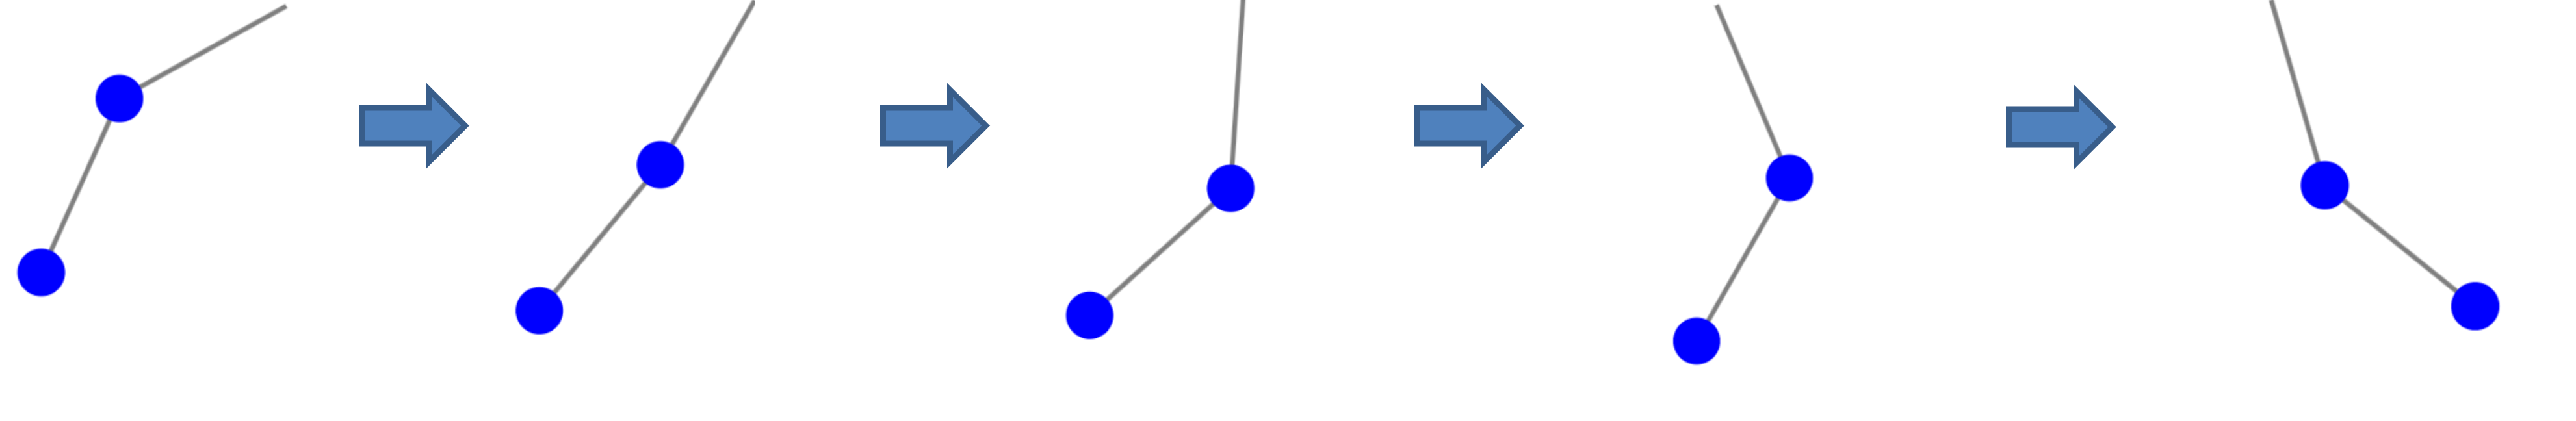

<br><br>
<font size = "5">
<b>Complexitiy of the Dobule Pendulum Problem</b>
</font>

<br>

<b>- Nonlinearity</b>
- The double pendulum's behavior is governed by nonlinear equations, leading to complex, unpredictable dynamics.

<b>- Sensitivity to Initial Conditions</b>
- Minor variations in the initial state can result in drastically different motions.

<b>-Lack of Periodicity</b>
- Unlike simple pendulums, the double pendulum lacks consistent cycles

<b>- Dependence on Multiple Parameters</b>
- The interplay of parameters like mass, length, and gravity affects the pendulum's motion.

Configuration vector $u ~=~ [\theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2 ]$ has two angles $\theta_1$ and $\theta_2$ and the angular velocity $\dot{\theta}_1$ and $\dot{\theta}_2$ so

$$
 \dot{\theta}_1 = \frac{d \theta_1}{dt} ~~~ and ~~~~  \dot{\theta}_2 = \frac{d \theta_2}{dt}
$$

For the purposes of numerical solution, the equations are written in the Lagrangian formalism.

$$
\ddot{\theta}_1 ~=~ \frac{- (m_1+m_2)g sin\theta_1 + m_2  g sin\theta_2 sin\Delta - m_2 sin\Delta (L_2 \dot\theta_2^2 + L_1\dot\theta_1^2cos\Delta)}{ (m_1+m_2)L_1 - m_2L_1cos^2\Delta}
$$


$$
\ddot{\theta}_2 ~=~ \frac{(m_1+m_2)(L_1\dot\theta_1^2sin\Delta - gsin\dot\theta_2 + gsin\dot\theta_1cos\Delta) + m_2 L_2 \dot\theta_2^2 sin\Delta cos\Delta}{(m_1+m_2)L_2 - m_2L_2cos^2\Delta}
$$

where $m_i, L_i$ and $\theta_i$ denote the masses, lengths, and angles from the vertical of the upper $(i = 1)$ and lower $(i = 2)$ pendulum, and  $\theta_1 - \theta_2 = \Delta$.

### Parameters

In [ ]:
m1 = 2.0  # Mass 1
m2 = 1.0  # Mass 2
L1 = 1.5  # Length 1
L2 = 1.0  # Length 2
g = 9.8  # Acceleration due to gravity

tfinal = 20.0       # Final time. Simulation time = 0 to tfinal.
Nt = 1000
t = np.linspace(0, tfinal, Nt)

## Lab 1: LSTM for Prediction

<b>Initial Conditions</b>
- $\theta_1 (0) = -80 °$
- $\theta_2 (0) = -150 °$
- $\dot\theta_1 (0) = 0$
- $\dot\theta_2 (0) = 0$


### Model Architecture

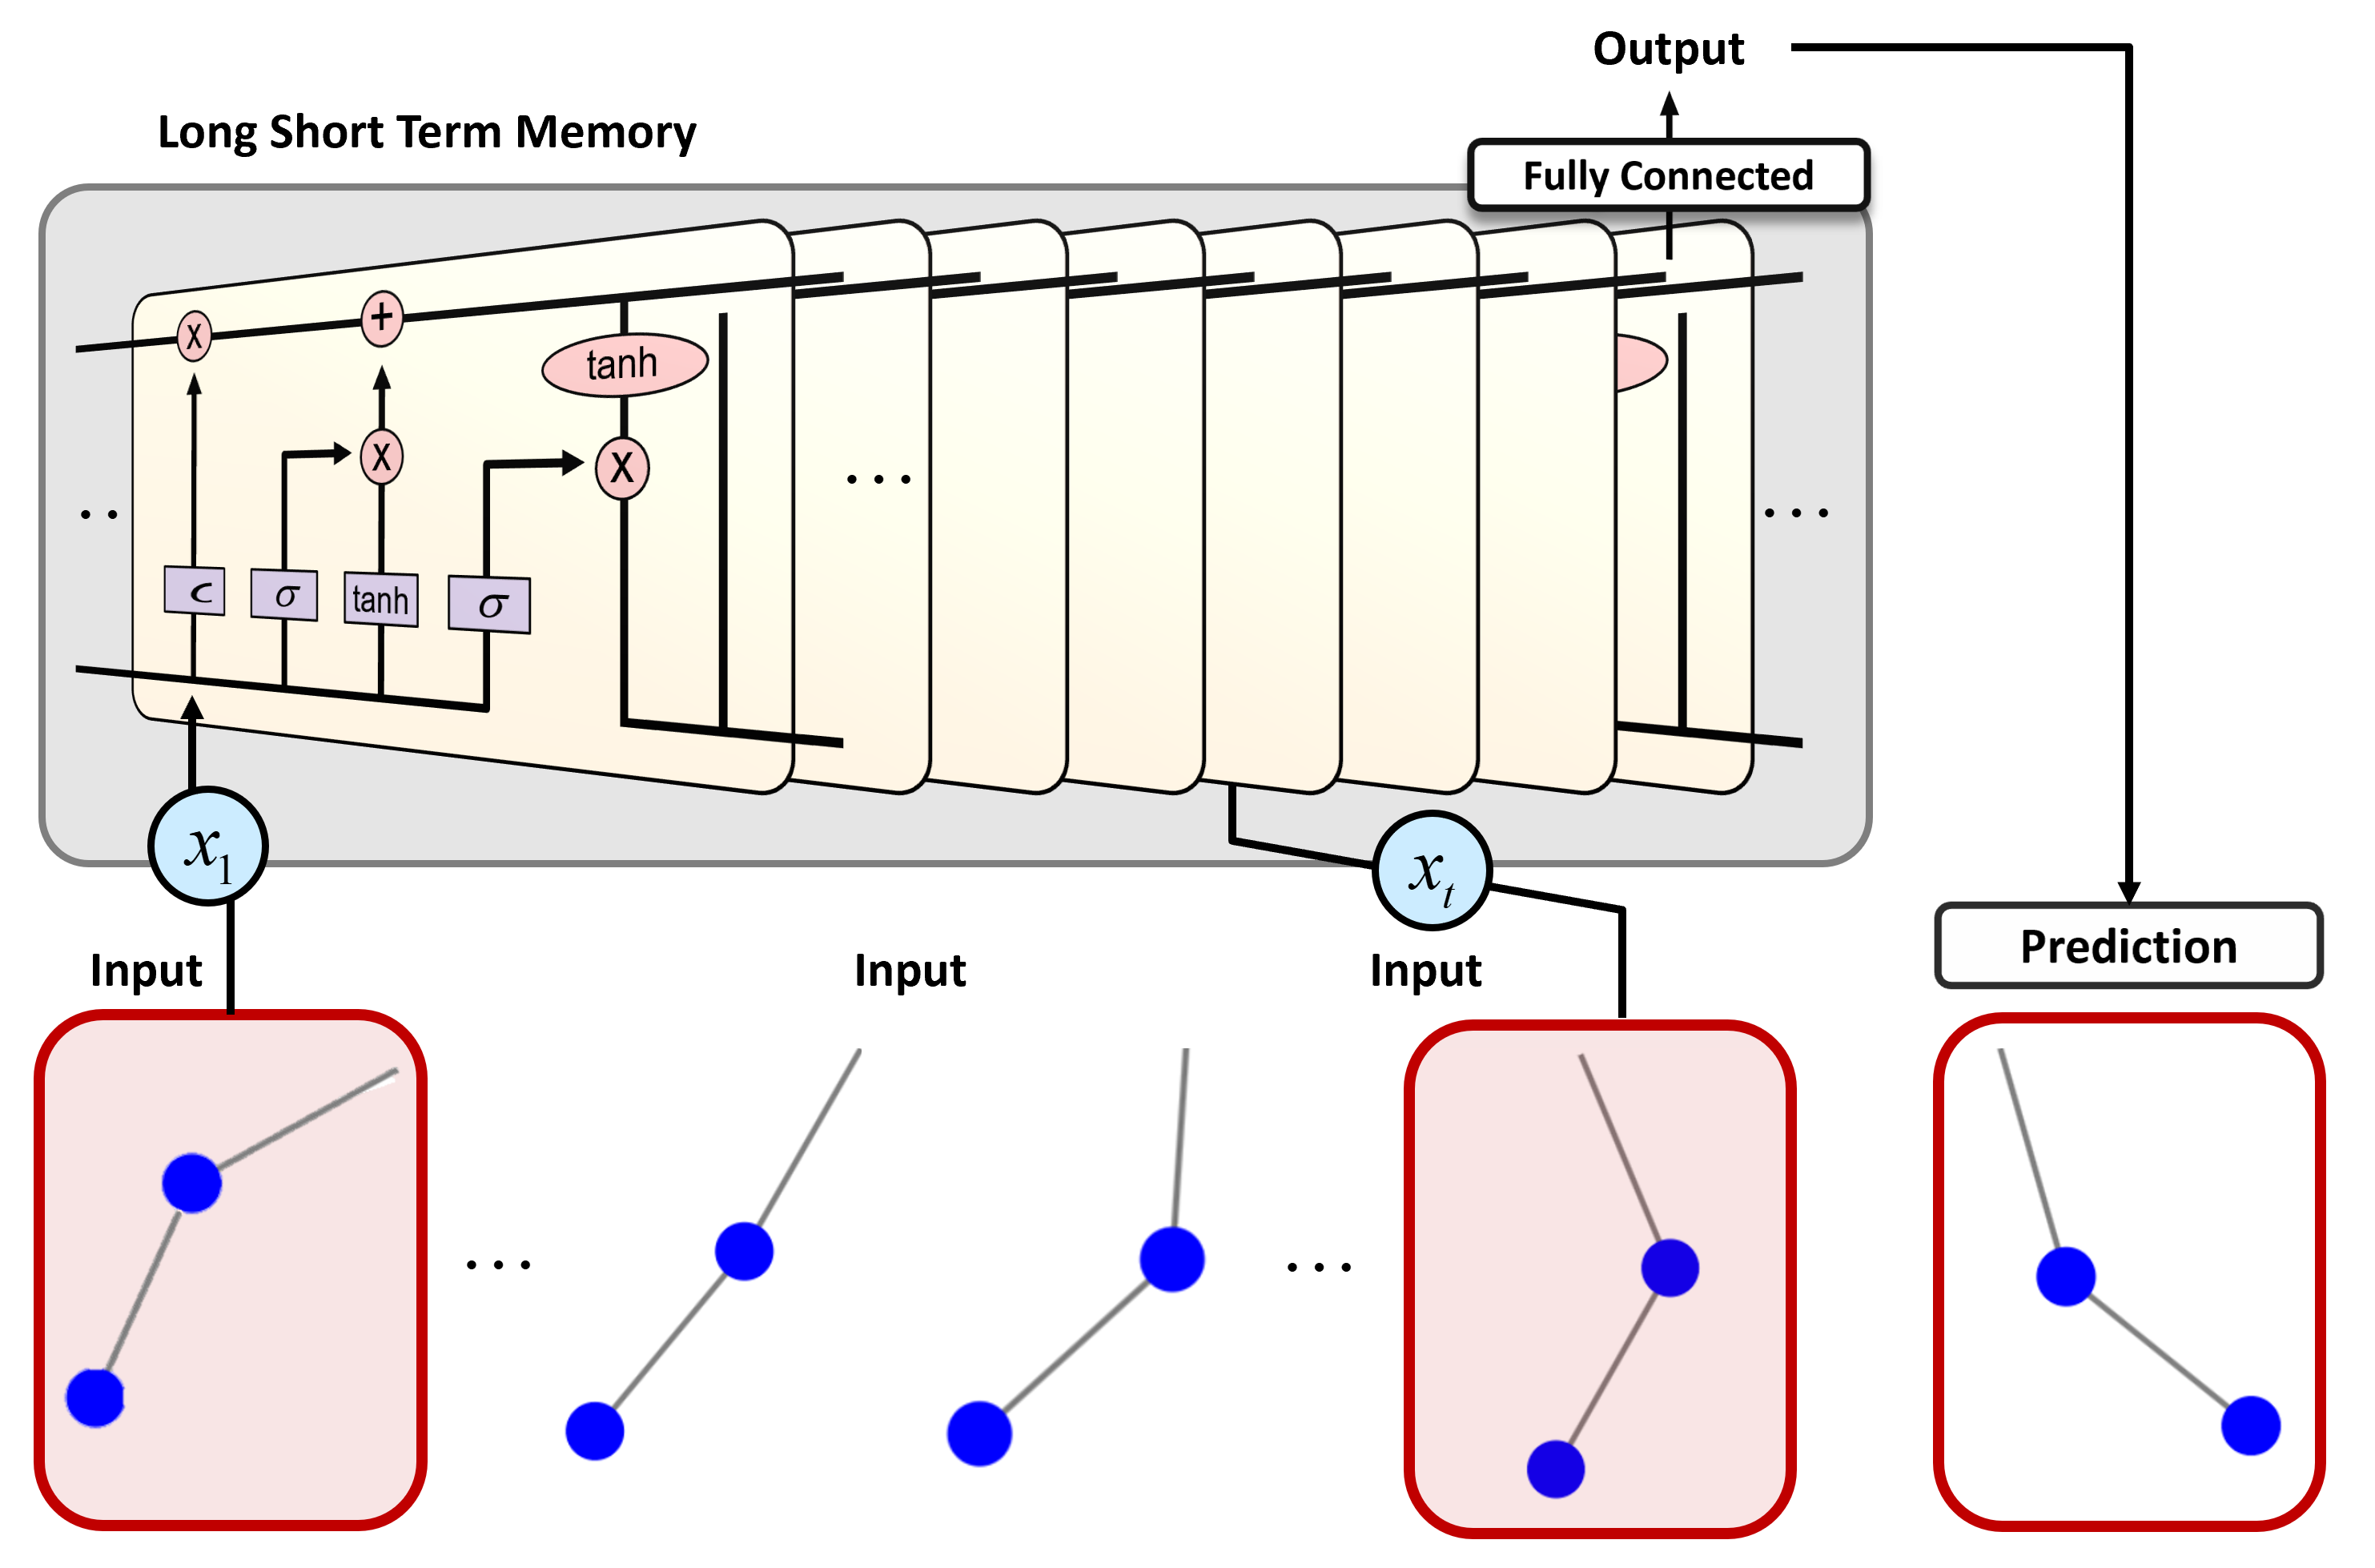

In [ ]:
X_train = np.load('/content/drive/MyDrive/ML_Colab/ML_data/03_Pendulum_Lab1_X_train.npy')
y_train = np.load('/content/drive/MyDrive/ML_Colab/ML_data/03_Pendulum_Lab1_y_train.npy')
X_test = np.load('/content/drive/MyDrive/ML_Colab/ML_data/03_Pendulum_Lab1_X_test.npy')
y_test = np.load('/content/drive/MyDrive/ML_Colab/ML_data/03_Pendulum_Lab1_y_test.npy')

In [ ]:
n_lstm1 = 100
n_lstm2 = 100
n_hidden = 100
n_output = 4

train_window = 50

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(train_window,4)),   # (timestep, features)
    tf.keras.layers.LSTM(n_lstm1, return_sequences = True),
    tf.keras.layers.LSTM(n_lstm2),
    tf.keras.layers.Dense(n_hidden),
    tf.keras.layers.Dense(n_output),
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 50, 100)           42000     
                                                                 
 lstm_15 (LSTM)              (None, 100)               80400     
                                                                 
 dense_25 (Dense)            (None, 100)               10100     
                                                                 
 dense_26 (Dense)            (None, 4)                 404       
                                                                 
Total params: 132904 (519.16 KB)
Trainable params: 132904 (519.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 50, batch_size=32)

Train on 500 samples
Epoch 1/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0730
Epoch 2/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0120
Epoch 3/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0054
Epoch 4/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0038
Epoch 5/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0027
Epoch 6/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0022
Epoch 7/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0018
Epoch 8/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0016
Epoch 9/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0015
Epoch 10/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0014
Epoch 11/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0012
Epoch 12/50
500/500 [==============================] - 1s 2ms/sa

### Evaluation

In [ ]:
raw = np.load('/content/drive/MyDrive/ML_Colab/ML_data/03_Pendulum_Lab1_RawData_for_Denormalization.npy')

preds = X_test[0].copy()        # (window, 4)
for i in range(len(X_test)):
    x = model.predict(np.expand_dims(preds[i:], axis = 0), verbose = 0)               # (1, 4)
    preds = np.concatenate((preds, x), axis = 0)

# -1 ~ 1 Denormalization
actual_predictions = (preds+1)/2*(raw.max(axis=0)-raw.min(axis=0))+raw.min(axis=0)

data = raw
data2 = np.concatenate((raw[:500], actual_predictions), axis = 0)

### Visualization

In [ ]:
from matplotlib import animation
from IPython.display import HTML

def make_anim2(data1, data2):
    def init():
        line1.set_data([], [])
        line2.set_data([], [])
        line3.set_data([], [])
        line4.set_data([], [])
        line5.set_data([], [])
        line6.set_data([], [])
        line7.set_data([], [])
        line8.set_data([], [])
        line9.set_data([], [])
        line10.set_data([], [])
        time_string.set_text('')
        return line3, line4, line5, line1, line2, line8, line9, line10, line6, line7, time_string

    def animate(i):
        trail1 = 6
        trail2 = 8
        dt = t[1] - t[0]  # time step

        line1.set_data(xp1_1[i:max(1,i-trail1):-1], yp1_1[i:max(1,i-trail1):-1])
        line2.set_data(xp2_1[i:max(1,i-trail2):-1], yp2_1[i:max(1,i-trail2):-1])
        line3.set_data([xp1_1[i], xp2_1[i]], [yp1_1[i], yp2_1[i]])
        line4.set_data([xp1_1[i], 0], [yp1_1[i], 0])
        line5.set_data([0, 0], [0, 0])
        line6.set_data(xp1_2[i:max(1,i-trail1):-1], yp1_2[i:max(1,i-trail1):-1])
        line7.set_data(xp2_2[i:max(1,i-trail2):-1], yp2_2[i:max(1,i-trail2):-1])
        line8.set_data([xp1_2[i], xp2_2[i]], [yp1_2[i], yp2_2[i]])
        line9.set_data([xp1_2[i], 0], [yp1_2[i], 0])
        line10.set_data([0, 0], [0, 0])

        time_string.set_text(time_template % (i * dt))
        return line3, line4, line5, line1, line2, line8, line9, line10, line6, line7, time_string

    fig = plt.figure(figsize = (5,4))
    ax = plt.axes(xlim=(-L1-L2-0.5, L1+L2+0.5), ylim=(-2.5, 1.5))

    # First set of lines (data1)
    line1, = ax.plot([], [], 'o-', color='#d2eeff', markersize=12, markerfacecolor='#0077BE', lw=2,
                     markevery=10000, markeredgecolor='k')
    line2, = ax.plot([], [], 'o-', color='#ffebd8', markersize=12, markerfacecolor='#f66338', lw=2,
                     markevery=10000, markeredgecolor='k', label = 'Ground Truth')
    line3, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
    line4, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
    line5, = ax.plot([], [], 'o', color='k', markersize=10)

    # Second set of lines (data2)
    line6, = ax.plot([], [], 'o-', color='#AEEEEE', markersize=12, markerfacecolor='#5F9EA0', lw=2,
                     markevery=10000, markeredgecolor='k')
    line7, = ax.plot([], [], 'o-', color='#FFC1C1', markersize=12, markerfacecolor='#DC143C', lw=2,
                     markevery=10000, markeredgecolor='k', label='Prediction')
    line8, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
    line9, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
    line10, = ax.plot([], [], 'o', color='k', markersize=10)

    time_template = 'Time = %.1f s'
    time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes, fontsize = 12)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

    # Calculate coordinates for data1
    u0_1 = data1[:, 0]
    u1_1 = data1[:, 1]
    u2_1 = data1[:, 2]
    u3_1 = data1[:, 3]
    xp1_1 = L1 * np.sin(u0_1)
    yp1_1 = -L1 * np.cos(u0_1)
    xp2_1 = xp1_1 + L2 * np.sin(u2_1)
    yp2_1 = yp1_1 - L2 * np.cos(u2_1)

    # Calculate coordinates for data2
    u0_2 = data2[:, 0]
    u1_2 = data2[:, 1]
    u2_2 = data2[:, 2]
    u3_2 = data2[:, 3]
    xp1_2 = L1 * np.sin(u0_2)
    yp1_2 = -L1 * np.cos(u0_2)
    xp2_2 = xp1_2 + L2 * np.sin(u2_2)
    yp2_2 = yp1_2 - L2 * np.cos(u2_2)

    ax.legend(loc='upper right', fontsize = 10)  # Add the legend to the plot
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=Nt, interval=1000 * (t[1] - t[0]) * 0.8, blit=True)
    return anim

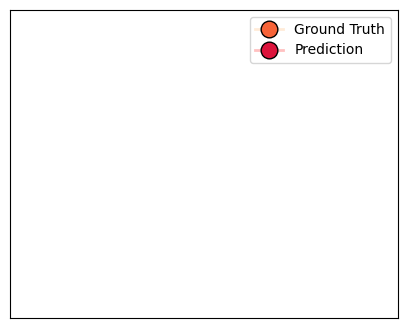

In [ ]:
anim_overlap = make_anim2(data,data2)

In [ ]:
HTML(anim_overlap.to_html5_video())

## Lab 2: LSTM for Prediction


<b>Initial Conditions</b>
- $\theta_1 (0) = -60 °$
- $\theta_2 (0) = -30 °$
- $\dot\theta_1 (0) = 0$
- $\dot\theta_2 (0) = 0$

In [ ]:
X_train = np.load('/content/drive/MyDrive/ML_Colab/ML_data/03_Pendulum_Lab2_X_train.npy')
y_train = np.load('/content/drive/MyDrive/ML_Colab/ML_data/03_Pendulum_Lab2_y_train.npy')
X_test = np.load('/content/drive/MyDrive/ML_Colab/ML_data/03_Pendulum_Lab2_X_test.npy')
y_test = np.load('/content/drive/MyDrive/ML_Colab/ML_data/03_Pendulum_Lab2_y_test.npy')

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(train_window,4)),   # (timestep, features)
    tf.keras.layers.LSTM(n_lstm1, return_sequences = True),
    tf.keras.layers.LSTM(n_lstm2),
    tf.keras.layers.Dense(n_hidden),
    tf.keras.layers.Dense(n_output),
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 50, 100)           42000     
                                                                 
 lstm_17 (LSTM)              (None, 100)               80400     
                                                                 
 dense_27 (Dense)            (None, 100)               10100     
                                                                 
 dense_28 (Dense)            (None, 4)                 404       
                                                                 
Total params: 132904 (519.16 KB)
Trainable params: 132904 (519.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 50, batch_size=32)

Train on 500 samples
Epoch 1/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0552
Epoch 2/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0081
Epoch 3/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0039
Epoch 4/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0028
Epoch 5/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0022
Epoch 6/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0018
Epoch 7/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0014
Epoch 8/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0012
Epoch 9/50
500/500 [==============================] - 1s 2ms/sample - loss: 9.1196e-04
Epoch 10/50
500/500 [==============================] - 1s 2ms/sample - loss: 7.6231e-04
Epoch 11/50
500/500 [==============================] - 1s 2ms/sample - loss: 7.3496e-04
Epoch 12/50
500/500 [==============================]

### Evaluation

In [ ]:
raw = np.load('/content/drive/MyDrive/ML_Colab/ML_data/03_Pendulum_Lab2_RawData_for_Denormalization.npy')

preds = X_test[0].copy()        # (window, 4)
for i in range(len(X_test)):
    x = model.predict(np.expand_dims(preds[i:], axis = 0), verbose = 0)               # (1, 4)
    preds = np.concatenate((preds, x), axis = 0)

# -1 ~ 1 Denormalization
actual_predictions = (preds+1)/2*(raw.max(axis=0)-raw.min(axis=0))+raw.min(axis=0)

data = raw
data2 = np.concatenate((raw[:500], actual_predictions), axis = 0)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


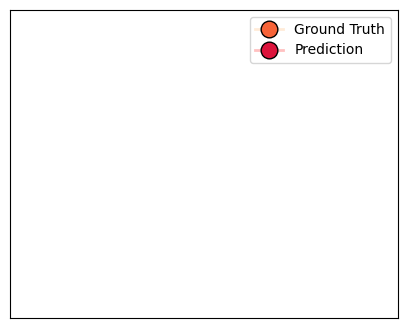

In [ ]:
anim_overlap = make_anim2(data,data2)

In [ ]:
HTML(anim_overlap.to_html5_video())

## Lab 3: LSTM for Prediction


<b>Initial Conditions</b>
- $\theta_1 (0) = -30 °$
- $\theta_2 (0) = 30 °$
- $\dot\theta_1 (0) = 0$
- $\dot\theta_2 (0) = 0$

In [ ]:
X_train = np.load('/content/drive/MyDrive/ML_Colab/ML_data/03_Pendulum_Lab3_X_train.npy')
y_train = np.load('/content/drive/MyDrive/ML_Colab/ML_data/03_Pendulum_Lab3_y_train.npy')
X_test = np.load('/content/drive/MyDrive/ML_Colab/ML_data/03_Pendulum_Lab3_X_test.npy')
y_test = np.load('/content/drive/MyDrive/ML_Colab/ML_data/03_Pendulum_Lab3_y_test.npy')

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(train_window,4)),   # (timestep, features)
    tf.keras.layers.LSTM(n_lstm1, return_sequences = True),
    tf.keras.layers.LSTM(n_lstm2),
    tf.keras.layers.Dense(n_hidden),
    tf.keras.layers.Dense(n_output),
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 50, 100)           42000     
                                                                 
 lstm_19 (LSTM)              (None, 100)               80400     
                                                                 
 dense_29 (Dense)            (None, 100)               10100     
                                                                 
 dense_30 (Dense)            (None, 4)                 404       
                                                                 
Total params: 132904 (519.16 KB)
Trainable params: 132904 (519.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 50, batch_size=32)

Train on 500 samples
Epoch 1/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0814
Epoch 2/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0099
Epoch 3/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0039
Epoch 4/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0028
Epoch 5/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0022
Epoch 6/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0020
Epoch 7/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0017
Epoch 8/50
500/500 [==============================] - 1s 2ms/sample - loss: 0.0015
Epoch 9/50
500/500 [==============================] - 1s 2ms/sample - loss: 9.8623e-04
Epoch 10/50
500/500 [==============================] - 1s 2ms/sample - loss: 6.8105e-04
Epoch 11/50
500/500 [==============================] - 1s 2ms/sample - loss: 3.1024e-04
Epoch 12/50
500/500 [==============================]

### Evaluation

In [ ]:
raw = np.load('/content/drive/MyDrive/ML_Colab/ML_data/03_Pendulum_Lab3_RawData_for_Denormalization.npy')

preds = X_test[0].copy()        # (window, 4)
for i in range(len(X_test)):
    x = model.predict(np.expand_dims(preds[i:], axis = 0), verbose = 0)               # (1, 4)
    preds = np.concatenate((preds, x), axis = 0)

# -1 ~ 1 Denormalization
actual_predictions = (preds+1)/2*(raw.max(axis=0)-raw.min(axis=0))+raw.min(axis=0)

data = raw
data2 = np.concatenate((raw[:500], actual_predictions), axis = 0)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


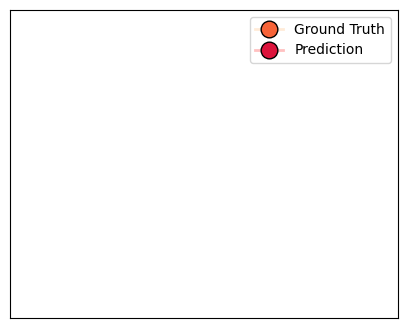

In [ ]:
anim_overlap = make_anim2(data,data2)

In [ ]:
HTML(anim_overlap.to_html5_video())

# Vehicle Speed Estimation

Data download: - [Vehicle video](https://www.dropbox.com/scl/fo/a58412k2xacjs76nyspmr/ADOPiIJd6TboGABsQBYS4Es?rlkey=ihetqdrvr122vc17l2owv13gn&dl=1)

<b>Objective</b>
- Develop a deep learning model to accurately estimate vehicle velocity.
- Output precise velocity predictions to enhance autonomous driving systems.

<b>Limitations of Traditional Methods</b>
- Sensor Dependency: Rely heavily on GPS, LIDAR, and RADAR, which can be expensive and prone to errors in certain conditions
- Speed Calculation using Wheel Rotation: Slippage, skidding, tire wear, etc.

In [ ]:
import random
from collections import OrderedDict
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import Sequence

import cv2
import os
from pathlib import Path

- Input: A sequence of 2 past frames of road scene images.
- Output: The predicted velocity of the vehicle.

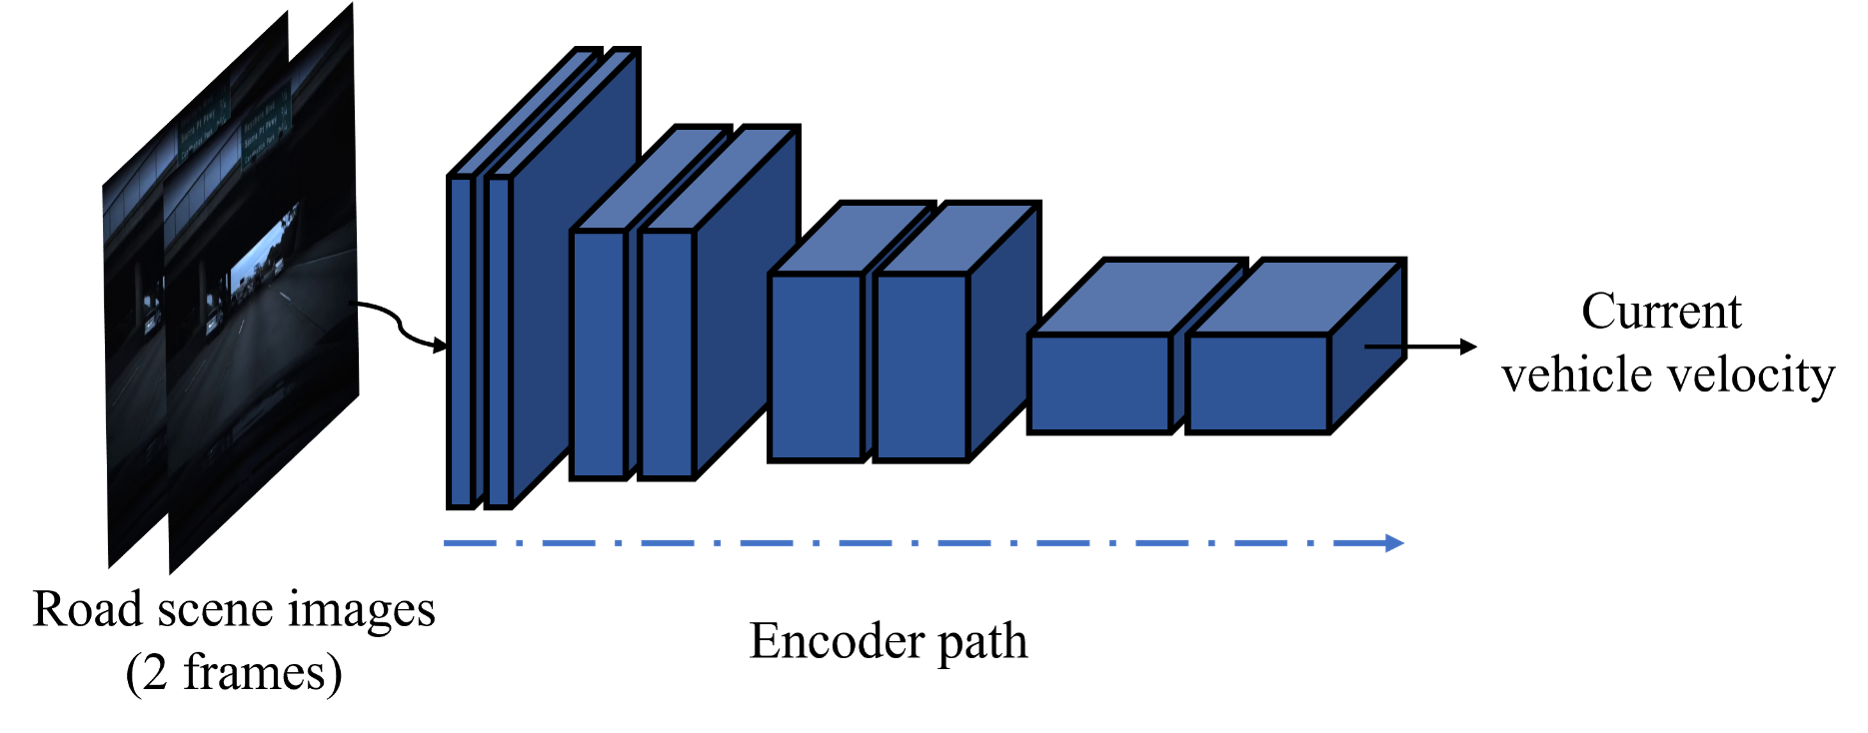

In [ ]:
X_train = np.load('/content/drive/MyDrive/ML_Colab/ML_data/04_Vehicle_X_train.npy')
y_train = np.load('/content/drive/MyDrive/ML_Colab/ML_data/04_Vehicle_y_train.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ML_Colab/ML_data/04_Vehicle_X_train.npy'

In [ ]:
# Model input
input_layer = Input(shape=(p['w'], p['h'], 6))

x1 = Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME')(input_layer)
x1 = MaxPool2D((2,2))(x1)
x1 = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'SAME')(x1)
x1 = MaxPool2D((2,2))(x1)
x1 = Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'SAME')(x1)
x1 = MaxPool2D((2,2))(x1)
x1 = Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'SAME')(x1)
x1 = MaxPool2D((2,2))(x1)
x1 = Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'SAME')(x1)
x1 = MaxPool2D((2,2))(x1)
x_f = Flatten()(x1)
x2 = Dense(128)(x_f)
encoded = Dense(6)(x2)

# Output layer
output_layer = Dense(1)(encoded)

# Build and compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=['mae'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240, 320, 6)]     0         
                                                                 
 conv2d (Conv2D)             (None, 240, 320, 32)      1760      
                                                                 
 max_pooling2d (MaxPooling2  (None, 120, 160, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 160, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 60, 80, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 80, 128)       73856 

In [ ]:
model.fit(train_ds, validation_data=valid_ds, epochs=30)

Epoch 1/30
32/32 [==============================] - 33s 1s/step - loss: 17.6449 - mae: 1.5617 - val_loss: 0.2779 - val_mae: 0.4795
Epoch 2/30
32/32 [==============================] - 32s 985ms/step - loss: 0.2535 - mae: 0.4446 - val_loss: 0.4094 - val_mae: 0.5390
Epoch 3/30
32/32 [==============================] - 32s 1s/step - loss: 0.1848 - mae: 0.3340 - val_loss: 0.2180 - val_mae: 0.4108
Epoch 4/30
32/32 [==============================] - 33s 1s/step - loss: 0.1763 - mae: 0.3325 - val_loss: 0.2491 - val_mae: 0.3879
Epoch 5/30
32/32 [==============================] - 33s 1s/step - loss: 0.1606 - mae: 0.3152 - val_loss: 0.1917 - val_mae: 0.3832
Epoch 6/30
32/32 [==============================] - 32s 1s/step - loss: 0.1132 - mae: 0.2766 - val_loss: 0.1353 - val_mae: 0.3169
Epoch 7/30
32/32 [==============================] - 32s 1s/step - loss: 0.1325 - mae: 0.3026 - val_loss: 0.1262 - val_mae: 0.2752
Epoch 8/30
32/32 [==============================] - 33s 1s/step - loss: 0.1040 - mae: 

## Evaluation

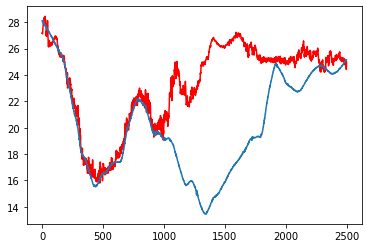

In [ ]:
image_files = natsorted(os.listdir('./data/frames_test/'))
X = np.zeros((len(image_files)-1, p['w'], p['h'], 6))
y = np.array([float(line.split()[0]) for line in open('./data/train_vel_test.txt').readlines()])
for i in range(len(image_files)-1):
    image1 = Image.open('./data/frames_test/'+image_files[i])
    image2 = Image.open('./data/frames_test/'+image_files[i+1])
    image1 = preprocess_image(np.array(image1), p['w'], p['h'], p['mean'], p['std'])
    image2 = preprocess_image(np.array(image2), p['w'], p['h'], p['mean'], p['std'])
    X[i] = tf.concat((image1, image2), axis = -1)

pred = model.predict(X, verbose = 0)
plt.plot(pred*p['divide_y'], 'red')
plt.plot(y[:-1])

## Visualization

In [ ]:
import os
from pathlib import Path
import cv2
import imageio

def annotate_frame_with_prediction(frame, prediction, ground_truth):
    """Annotate the frame with the prediction and ground truth values."""
    font = cv2.FONT_HERSHEY_SIMPLEX
    org_pred = (50, 50)
    org_gt = (50, 100)
    font_scale = 1
    color_pred = (255, 0, 0)
    color_gt = (0, 255, 0)
    thickness = 2
    annotated_frame = cv2.putText(frame, f'Prediction: {prediction:.2f} mph', org_pred, font, font_scale, color_pred, thickness, cv2.LINE_AA)
    annotated_frame = cv2.putText(annotated_frame, f'Ground Truth: {ground_truth:.2f} mph', org_gt, font, font_scale, color_gt, thickness, cv2.LINE_AA)
    return annotated_frame

def create_gif_with_predictions(input_dir, labels_file, output_gif, model):
    """Create a GIF from annotated frames with predictions and ground truth."""
    frames = []
    frame_files = sorted([f for f in os.listdir(input_dir) if f.endswith('.png')], key=lambda x: int(x.split('.')[0]))
    labels = [float(line.split()[0]) for line in open(labels_file).readlines()]

    for i in range(len(frame_files) - 1):
        frame_file_1 = frame_files[i]
        frame_file_2 = frame_files[i + 1]

        frame_path_1 = os.path.join(input_dir, frame_file_1)
        frame_path_2 = os.path.join(input_dir, frame_file_2)

        frame_1 = cv2.imread(frame_path_1)
        frame_2 = cv2.imread(frame_path_2)

        # Preprocess the frames as needed for the model
        frame_1_resized = preprocess_image(frame_1, p['w'], p['h'], p['mean'], p['std'])
        frame_2_resized = preprocess_image(frame_2, p['w'], p['h'], p['mean'], p['std'])

        # Combine frames along the channel dimension
        combined_frames = tf.concat((frame_1_resized, frame_2_resized), axis=-1)
        frame_input = tf.reshape(combined_frames, (1, p['w'], p['h'], 3*2))

        # Make prediction
        prediction = model.predict(frame_input)[0][0]

        # Ground truth
        ground_truth = labels[i] / p['divide_y']

        # Annotate the first frame with prediction and ground truth
        annotated_frame = annotate_frame_with_prediction(frame_1, prediction*10, ground_truth*10)
        resized_annotated_frame = cv2.resize(annotated_frame, (p['w'], p['h']))

        # Convert BGR (OpenCV format) to RGB (imageio format)
        annotated_frame_rgb = cv2.cvtColor(resized_annotated_frame, cv2.COLOR_BGR2RGB)
        frames.append(annotated_frame_rgb)

    # Save frames as a GIF
    imageio.mimsave(output_gif, frames, fps=20)

# Example usage:
input_dir = "./data/frames_test"
labels_file = "./data/train_vel_test.txt"
output_gif = "./data/output.gif"

create_gif_with_predictions(input_dir, labels_file, output_gif, model)
